![](fig/univ.png)

# AI-1: ML/AI Basics
## Project: Option 2: Let's play Fifa! ⚽️

**AI1 Cohort 2**<br/>
**Univ.AI**<br/>
**Instructor**: Pavlos Protopapas, Ignacio Becker<br/>

<hr style="height:2.4pt">

**Name of the people who have worked on the Project:**<br>
<span style="color:red">**Aditya Sreedhar, Bhaskar Bharat, Ekanki Agarwal and Bharat Rengarajan**</span>

# Problem Statement
## FIFA 20
Football is arguably the most popular sport in the world and FIFA is the most popular football (soccer) simulation game by Electronic Arts (EA Sports). 

The game is not to be confused with the official International Federation for Football ([FIFA](https://www.fifa.com/)).

You are given the following public dataset, scraped from https://sofifa.com. The data lists soccer players from the 2015-2020 editions of EA Sports **FIFA video game**. It consists of player positions, player attributes and personal data.


### Problem 
The player club changes can be tracked using the unique Sofifa id across all years. The problem statement is as follows: 

### [Part A - Rank the Players](#partA)      

> <span style="color:brown">*Who is the best player in the world according to your analysis?*</span>

- Use data from FIFA 19. Predict the Overall (OVR ) skill Statistic for players in the FIFA 20 Edition. Train on all players from FIFA 19

- Graphically represent the Overall data for the players in test set (see below0

### Instructions : 
- Sofifa Id, URL, Name, Potential, Real face, URL variables cannot be used during the prediction or learning. 

- In case of a change in playing position, alter FIFA 20 position to match FIFA 19 Position 

- The final score will be assigned using MSE. 

- Test Set: Players from the following Clubs 

  - FC Barcelona

  - FC Bayern München

  - Real Madrid 

  - Paris Saint-Germain

  - Juventus

  - Manchester City

  - Liverpool FC

### [Part B - Classify player position](#partB)

> <span style="color:brown">*Can a professional defender become a forward?*</span>

- Train on data from FIFA 19. Predict the player_position variable using other skill statistics for players in the FIFA 20 Edition. Train on all players from FIFA 19

- Graphically represent the predicted player_position for the players in Test Set 

Details : 

- Sofifa Id, URL, Wage, Salary, Name, Real face, URL variables cannot be used during the prediction or learning. *

- The final score will be assigned using Classification accuracy

- Test Set: Players from the following Clubs 

  - FC Barcelona

  - FC Bayern München

  - Real Madrid 

  - Paris Saint-Germain

  - Juventus

  - Atlético Madrid

  - Manchester City

  - Liverpool 

  - Manchester United

### [Part C - Which Club has the Best Staff](#partC)

> <span style="color:brown">*The best staff always help their players grow, can you identify that using historical data?*</span>

- Study player data from Division 1 European League* players from the last 5 Years. Analyze changes in player stats and value. Rank the clubs according to best increase in statistics of a player

- Graphically represent the scores for the test set

Details :

- Sofifa Id, URL, Wage, Salary, Name, Real face, URL variables cannot be used during the prediction or learning. 

- Assign a score to all clubs out of 100, and represent it in an appropriate visualization. With 100 being the highest 

- For the test set, your model will be scored using MSE against the average of all models of the class. (Score = MSE( Your Values , Average of all models values))

- The test set is as follows for this problem statement (Division 1 European League):

Leagues to be considered

- Premier League - English Premier League

- Bundesliga German 1. Bundesliga

- Ligue 1 French Ligue 1

- La Liga Spain Primera Division

- Serie A Italian Serie A

In [ ]:
# RUN THIS CELL 
# import requests
# from IPython.core.display import HTML

In [2]:
# Import libraries
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import Lasso,Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, recall_score, precision_score, f1_score, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import re
sns.set()

import warnings

# Better display of Pandas Dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Part A - Rank the Players<a id="partA"></a>

> <span style="color:brown">*Who is the best player in the world according to your analysis?*</span>

- Use data from FIFA 19. Predict the Overall (OVR ) skill Statistic for players in the FIFA 20 Edition. Train on all players from FIFA 19

- Graphically represent the Overall data for the players in test set (see below0

### Instructions : 
- Sofifa Id, URL, Name, Potential, Real face, URL variables cannot be used during the prediction or learning. 

- In case of a change in playing position, alter FIFA 20 position to match FIFA 19 Position 

- The final score will be assigned using MSE. 

- Test Set: Players from the following Clubs 

  - FC Barcelona

  - FC Bayern München

  - Real Madrid 

  - Paris Saint-Germain

  - Juventus

  - Manchester City

  - Liverpool FC

In [200]:
#reading the data
df_train=pd.read_csv("fifadataset/players_19.csv")
df_train.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,127100000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Diver, Flair, Long Shot Taker...",84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,94,94,110500000,565000,"CF, RW, ST",Left,5,4,4,Medium/Medium,Messi,Yes,226500000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,10.0,NaN,2004-07-01,2021.0,CF,10.0,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,90+2,84+2,84+2,84+2,90+2,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,228100000.0,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Selfish, Flair, Speed Dribbler (CPU AI ...",79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,91,93,72000000,260000,GK,Right,4,3,1,Medium/Medium,Lean,Yes,138600000.0,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,94.0,58.0,88.0,"GK Long Throw, Saves with Feet",17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,91,92,102000000,355000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,196400000.0,"#Dribbler, #Playmaker , #Eng

**Graphically representing the response variable overall**

Text(0.5, 1.0, 'Frequency distribution of Overall rating statistic of the players')

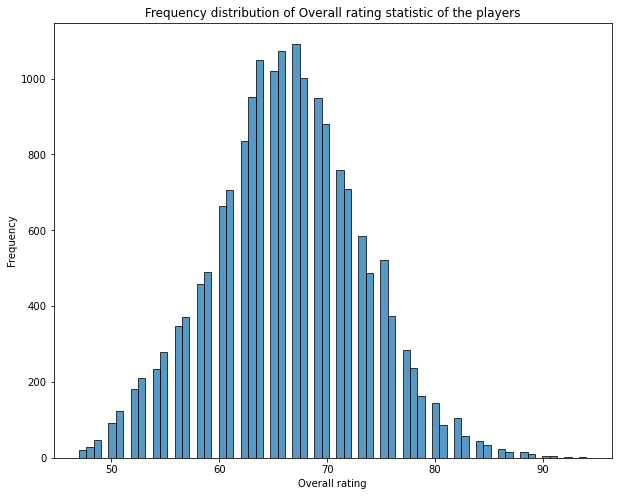

In [204]:
fig=plt.figure(figsize=(10,8))
sns.histplot(df_train["overall"])
plt.xlabel("Overall rating")
plt.ylabel("Frequency")
plt.title("Frequency distribution of Overall rating statistic of the players")

**Data high level structure**

In [9]:
print("The high level data structure is:")
print("*********************************")
print(df_train.info())

The high level data structure is:
*********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(11), object(77)
memory usage: 14.1+ MB
None


**The data types of different variables in the data**

In [11]:
print("The data types of different variables in the data are:")
print("*****************************************************")
print(df_train.dtypes)

The data types of different variables in the data are:
*****************************************************
sofifa_id                       int64
player_url                     object
short_name                     object
long_name                      object
age                             int64
dob                            object
height_cm                       int64
weight_kg                       int64
nationality                    object
club                           object
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
player_positions               object
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
work_rate                      object
body_type                      object
real_face                      object
release_clause_eur            float64
player_tags      

**Missing information in the data**

In [13]:
missing_info=df_train.isnull().sum()
print("Features having missing values")
print("******************************")
print(missing_info[missing_info>0])

Features having missing values
******************************
release_clause_eur       1513
player_tags             16254
team_position             223
team_jersey_number        223
loaned_from             16489
joined                   1504
contract_valid_until      223
nation_position         16666
nation_jersey_number    16666
pace                     1986
shooting                 1986
passing                  1986
dribbling                1986
defending                1986
physic                   1986
gk_diving               15784
gk_handling             15784
gk_kicking              15784
gk_reflexes             15784
gk_speed                15784
gk_positioning          15784
player_traits            9760
ls                       1986
st                       1986
rs                       1986
lw                       1986
lf                       1986
cf                       1986
rf                       1986
rw                       1986
lam                      1986
cam     

**Some features are dropped based on human judgement which are not found to be very intuitive or useful in the prediction of overall rating of the players in the game**

In [34]:
dropped_feat=["sofifa_id","player_url","short_name","long_name","dob","nationality","club","potential","real_face","wage_eur","release_clause_eur","player_tags","team_position","team_jersey_number","loaned_from","joined","contract_valid_until","nation_position","nation_jersey_number","player_traits"]
df_temp=df_train.drop(dropped_feat,axis=1)
print(f"The shape of the data is {df_temp.shape}")

The shape of the data is (17770, 84)


**Missing information in the reduced data**

In [35]:
missing_vals=df_temp.isnull().sum()
print("The variables with missing values:")
print("***********************************")
print(missing_vals[missing_vals>0])

The variables with missing values:
***********************************
pace               1986
shooting           1986
passing            1986
dribbling          1986
defending          1986
physic             1986
gk_diving         15784
gk_handling       15784
gk_kicking        15784
gk_reflexes       15784
gk_speed          15784
gk_positioning    15784
ls                 1986
st                 1986
rs                 1986
lw                 1986
lf                 1986
cf                 1986
rf                 1986
rw                 1986
lam                1986
cam                1986
ram                1986
lm                 1986
lcm                1986
cm                 1986
rcm                1986
rm                 1986
lwb                1986
ldm                1986
cdm                1986
rdm                1986
rwb                1986
lb                 1986
lcb                1986
cb                 1986
rcb                1986
rb                 1986
dtype: int64


**Variables with object as the data type**

In [36]:

print(f"Features having object as the data type:\n************************************\n {list(df_temp.dtypes[df_temp.dtypes=='object'].index)}")

Features having object as the data type:
************************************
 ['player_positions', 'preferred_foot', 'work_rate', 'body_type', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'r

**Preprocessing of categorical features and converting/encoding those to numerical features***

In [37]:
def preprocess_vals(val):
    if type(val)==str:
        val=val.strip().replace(" ","")
        if len(val)>1:
            if val[1]=="-" or val[1]=="+":
                a=int(val[0:1])
                b=int(val[1:])
            else:
                a=int(val[0:2])
                if val[2:]=="":
                    b=0
                else:
                    b=int(val[2:])
        else:
            a=int(val[0])
            b=0
        res=a+b
        return res
    else:
        return val
cols_to_preprocess=list(df_temp.dtypes[df_temp.dtypes=="object"].index[4:])
for col in cols_to_preprocess:
    df_temp[col]=df_temp[col].apply(preprocess_vals)

**Encoding work-rate, preferred foot and body type**

In [38]:
df_temp["work_rate"].value_counts()
df_temp["work_rate_1"]=df_temp["work_rate"].str.strip().str.split("/").apply(lambda x:x[0]).map({"Low":0,"Medium":1,"High":2})
df_temp["work_rate_2"]=df_temp["work_rate"].str.strip().str.split("/").apply(lambda x:x[1]).map({"Low":0,"Medium":1,"High":2})

In [39]:
df_temp["preferred_foot"].value_counts()
df_temp["preferred_foot_cat"]=df_temp["preferred_foot"].str.strip().map({"Right":0,"Left":1})


In [40]:
df_temp["body_type"].value_counts()
df_temp.loc[df_temp["body_type"].isin(["Neymar","Messi","Shaqiri","PLAYER_BODY_TYPE_25","C. Ronaldo","Courtois","Akinfenwa"]),"body_type"]="Normal"

In [41]:
df_temp["body_type"].value_counts()
df_temp=pd.get_dummies(df_temp,columns=["body_type"],prefix="body-type")
df_temp.head()

,age,height_cm,weight_kg,overall,value_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,work_rate_1,work_rate_2,preferred_foot_cat,body-type_Lean,body-type_Normal,body-type_Stocky
0,33,187,83,94,77000000,"ST, LW",Right,5,4,5,High/Low,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,2,0,0,0,1,0
1,31,170,72,94,110500000,"CF, RW, ST",Left,5,4,4,Medium/Medium,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,92.0,86.0,86.0,86.0,92.0,65.0,63.0,63.0,63.0,65.0,60.0,49.0,49.0,49.0,60.0,1,1,1,0,1,0
2,26,175,68,92,118500000,"LW, CAM",Right,5,5,5,High/Medium,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0,2,1,0,0,1,0
3,27,193,76,91,72000000,GK,Right,4,3,1,Medium/Medium,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,94.0,58.0,88.0,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,1,0,0
4,27,181,70,91,102000000,"CAM, CM",Right,4,5,4,High/High,77.0,86.0,92.0,87.0,60.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,93,83,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,60,87,94,79,88,67,58,51,15,13,5,10,13,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0,2,2,0,0,1,0


**Treatment of missing data**
**Missing values pertain to the players if he is a goal keeper or not. For goal keepers, the other skill ratings are missing which is qual to 1986 of those.
**For those not in GK position , other skill values are missing.
**Therefore all missing values are replaced with zero value
**Also, in addition, a GK indicator is created for the position if a player is a goal keeper or not.**

In [17]:
#The assumption as per the data is that goal keepers donot have scores for pace,shooting,passing,drippling,defending and physic
df_temp.describe()

,age,height_cm,weight_kg,overall,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,work_rate_1,work_rate_2,preferred_foot_cat,body-type_Lean,body-type_Normal,body-type_Stocky
count,17770.000000,17770.000000,17770.000000,17770.000000,1.777000e+04,17770.000000,17770.000000,17770.000000,17770.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.00000,17770.000000,17770.000000,17770.0000,17770.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,15784.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000,17770.000000
mean,25.193922,181.253292,75.310917,66.240405,2.440756e+06,9956.162071,1.117783,2.946427,2.346595,67.815319,52.248733,57.082172,62.267169,51.665484,64.972567,65.374622,62.931017,61.511078,66.149043,38.675730,63.088117,49.696342,45.548227,52.295836,58.675408,42.916207,55.320653,47.142487,42.921328,52.678784,58.330613,64.491277,64.625098,63.474114,61.869893,63.933315,55.458075,65.107485,63.131007,65.385031,47.080698,55.754868,46.650366,49.930388,53.353180,48.638886,58.683737,47.239167,47.627293,45.610636,16.72386,16.491277,16.342656,16.4852,16.823579,59.762671,59.762671,59.762671,60.963571,60.644323,60.644323,60.644323,60.963571,60.908768,60.908768,60.908768,61.646858,60.137608,60.137608,60.137608,61.646858,59.427078,58.741384,58.741384,58.741384,59.427078,58.725101,57.550558,57.550558,57.550558,58.725101,1.220203,1.084412,0.232470,0.352729,0.586213,0.061058
std,4.651957,6.745892,7.080013,6.994104,5.644779e+06,22330.640048,0.401085,0.659353,0.749672,11.329319,14.034645,10.589207,10.442659,16.347564,9.745859,7.807033,7.556389,7.667533,8.234898,10.420846,8.664458,18.440858,19.619214,17.450785,14.781885,17.729120,18.966102,18.446118,17.555498,15.427257,16.749015,15.015555,14.766585,14.831799,9.091710,14.201210,17.289544,11.941386,16.042211,12.653625,19.329969,17.424654,20.768429,19.591361,14.224579,15.780035,11.443265,19.993940,21.742714,21.374133,17.82597,17.033740,16.633849,17.1575,18.087210,9.221544,9.221544,9.221544,9.970526,9.935403,9.935403,9.935403,9.970526,9.869338,9.869338,9.869338,9.344361,8.911396,8.911396,8.911396,9.344361,9.046194,10.160027,10.160027,10.160027,9.046194,9.595580,11.766734,11.766734,11.766734,9.595580,0.522193,0.499163,0.422419,0.477833,0.492525,0.239443
min,16.000000,154.000000,50.000000,47.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,24.000000

In [42]:
df_temp.fillna(0,inplace=True)
df_temp["goal_keeper_ind"]=df_temp["player_positions"].apply(lambda x: 1 if x=="GK" else 0)    

In [43]:
df_temp["goal_keeper_ind"].sum()

1986

**Exploratory Data analysis**

**Body type: Based on the descriptive analysis given below, the overall ratings are not significantly different among the different body types which is in line with intuition**

In [44]:
print("The group by statistics for the feature body-type")
print("*************************************************")
print(df_temp.groupby(by="body-type_Lean").describe()["overall"])
print("*************************************************")
print(df_temp.groupby(by="body-type_Stocky").describe()["overall"])
print("*************************************************")
print(df_temp.groupby(by="body-type_Normal").describe()["overall"])
print("*************************************************")
print(df_train.groupby(by="body_type").describe()["overall"])

The group by statistics for the feature body-type
*************************************************
                  count       mean       std   min   25%   50%   75%   max
body-type_Lean                                                            
0               11502.0  66.649452  6.787140  47.0  62.0  67.0  71.0  94.0
1                6268.0  65.489789  7.299934  47.0  61.0  65.0  70.0  91.0
*************************************************
                    count       mean       std   min   25%   50%   75%   max
body-type_Stocky                                                            
0                 16685.0  66.146719  7.032815  47.0  62.0  66.0  71.0  94.0
1                  1085.0  67.681106  6.196183  48.0  64.0  68.0  72.0  89.0
*************************************************
                    count       mean       std   min   25%   50%   75%   max
body-type_Normal                                                            
0                  7353.0  65.813137  

**Work-Rate: Based on the descriptive analysis given below, given that the distribution of overall rating is similar across different types of work rate, it can be concluded as not being a powerful predictor of Overall rating. This is in line with intuition**

In [45]:
print("The group by statistics for the feature work rate")
print("*************************************************")
print(df_temp.groupby(by="work_rate").describe()["overall"])
print("*************************************************")
print(df_temp.groupby(by="work_rate_1").describe()["overall"])
print("*************************************************")
print(df_temp.groupby(by="work_rate_2").describe()["overall"])

The group by statistics for the feature work rate
*************************************************
                count       mean       std   min   25%   50%   75%   max
work_rate                                                               
High/High       976.0  70.284836  6.580532  50.0  66.0  70.0  75.0  91.0
High/Low        682.0  67.709677  6.634192  51.0  63.0  68.0  72.0  94.0
High/Medium    3152.0  68.196383  6.626870  47.0  64.0  68.0  73.0  92.0
Low/High        423.0  67.170213  5.556207  50.0  64.0  67.0  71.0  86.0
Low/Low          31.0  64.612903  4.814405  49.0  62.5  65.0  68.0  72.0
Low/Medium      443.0  65.765237  6.301186  47.0  62.0  66.0  70.0  84.0
Medium/High    1628.0  68.217445  6.499729  47.0  64.0  68.0  72.0  90.0
Medium/Low      814.0  66.905405  6.668916  48.0  63.0  67.0  71.0  87.0
Medium/Medium  9621.0  64.680595  6.932279  47.0  60.0  65.0  69.0  94.0
*************************************************
               count       mean       std   min

**Similar conclusions can be drawn for goal keeper indicator as well as preferred foot. The analyses is given below**

In [47]:
print("The group by statistics for the feature goal-keeper indicator")
print("*************************************************")
print(df_temp.groupby(by="goal_keeper_ind").describe()["overall"])
print("The group by statistics for the feature preferred foot")
print("*************************************************")
print(df_temp.groupby(by="preferred_foot_cat").describe()["overall"])

The group by statistics for the feature goal-keeper indicator
*************************************************
                   count       mean       std   min   25%   50%   75%   max
goal_keeper_ind                                                            
0                15784.0  66.438925  6.886712  47.0  62.0  66.0  71.0  94.0
1                 1986.0  64.662638  7.615177  47.0  59.0  64.5  70.0  91.0
The group by statistics for the feature preferred foot
*************************************************
                      count       mean       std   min   25%   50%   75%   max
preferred_foot_cat                                                            
0                   13639.0  66.076545  7.091302  47.0  61.0  66.0  71.0  94.0
1                    4131.0  66.781409  6.635286  47.0  63.0  67.0  71.0  94.0


**Correlation analysis: From the heatmap displayed below, quite a few predictors seem to exhibit correlation with other predictors. Hence, to deal with this, we go ahead with using standard regularization techniques. As a next step, we look at the correlation values of the predictors with the response variable that is the overall rating of the players**

The correlation matrix of the data


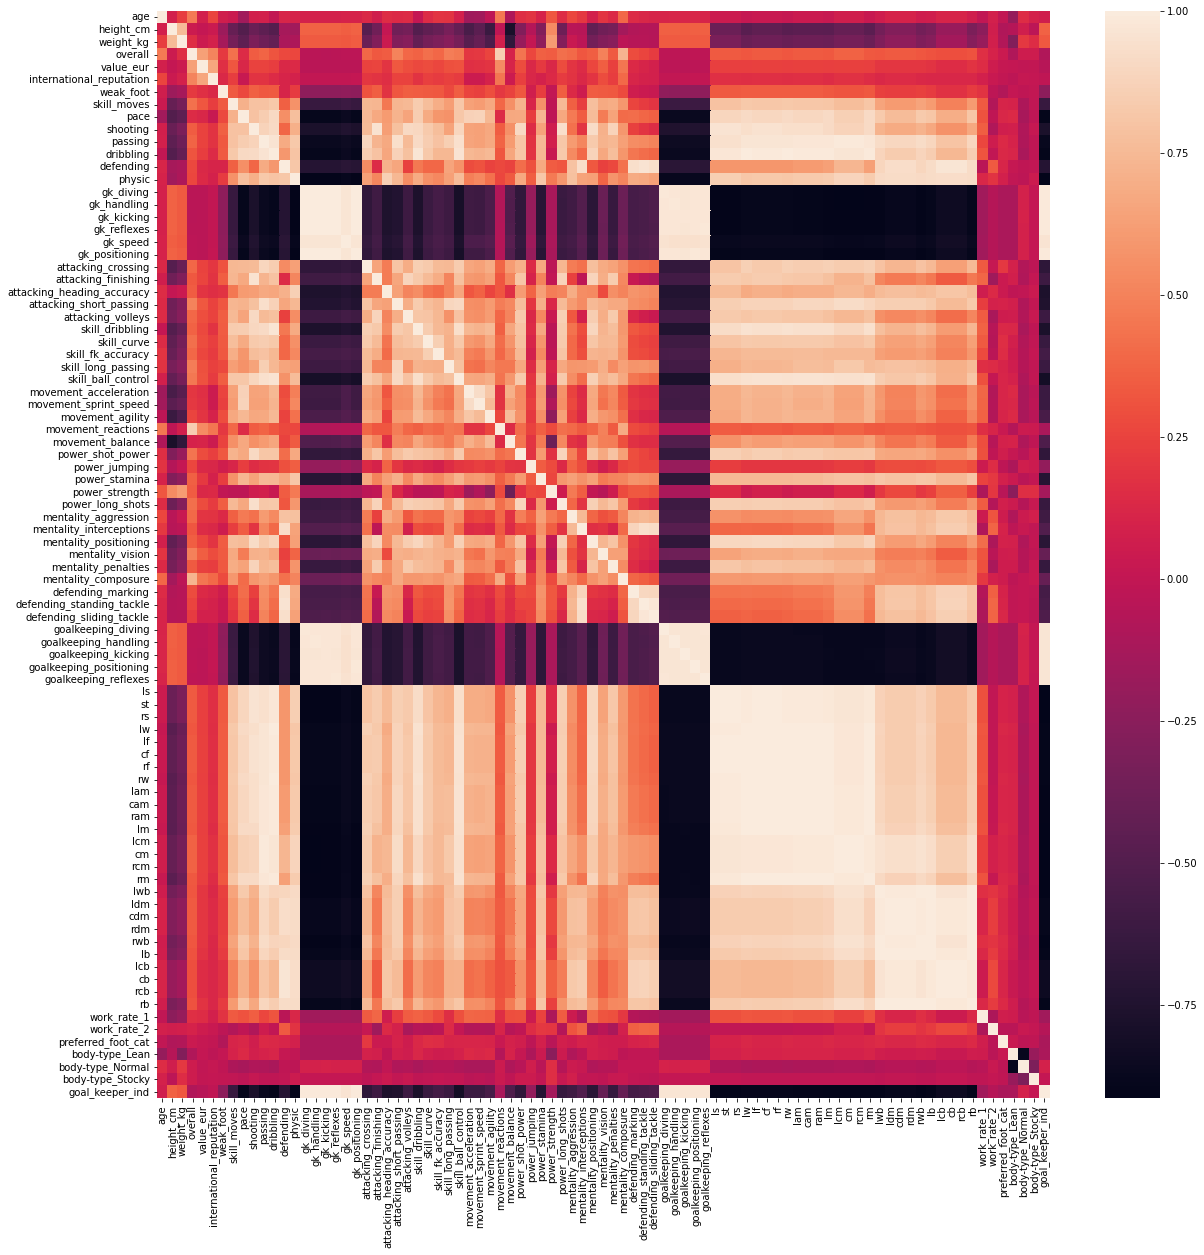

In [54]:
print("The correlation matrix of the data")
plt.figure(figsize=(20,20))
sns.heatmap(df_temp.corr())


In [55]:
print("The correlation of the predictors with the response variable 'Overall'")
print("**********************************************************************")
print(df_temp.corr()["overall"].sort_values(ascending=False))

The correlation of the predictors with the response variable 'Overall'
**********************************************************************
overall                       1.000000
movement_reactions            0.849389
mentality_composure           0.727513
value_eur                     0.626512
international_reputation      0.509023
attacking_short_passing       0.499066
mentality_vision              0.495662
skill_long_passing            0.481536
age                           0.463201
skill_ball_control            0.459513
power_shot_power              0.440778
skill_moves                   0.425343
power_long_shots              0.420443
skill_curve                   0.419342
mentality_aggression          0.398322
skill_fk_accuracy             0.394084
attacking_crossing            0.393630
attacking_volleys             0.390377
passing                       0.372866
skill_dribbling               0.370433
rcm                           0.365140
cm                            0.365140


**As part of the above analysis, we drop the features having less than 20% correlation with the response variable**

In [56]:
print("Features having more than 20% correlation with the response variable")
print("********************************************************************")
print(df_temp.corr()["overall"][abs(df_temp.corr()["overall"])>0.20].sort_values(ascending=False))

Features having more than 20% correlation with the response variable
********************************************************************
overall                       1.000000
movement_reactions            0.849389
mentality_composure           0.727513
value_eur                     0.626512
international_reputation      0.509023
attacking_short_passing       0.499066
mentality_vision              0.495662
skill_long_passing            0.481536
age                           0.463201
skill_ball_control            0.459513
power_shot_power              0.440778
skill_moves                   0.425343
power_long_shots              0.420443
skill_curve                   0.419342
mentality_aggression          0.398322
skill_fk_accuracy             0.394084
attacking_crossing            0.393630
attacking_volleys             0.390377
passing                       0.372866
skill_dribbling               0.370433
rcm                           0.365140
lcm                           0.365140
cm  

**Based on the above Exploratory Analysis, we drop the features which aren't found to be correlated with the response variable**

In [58]:
df_temp.drop(["preferred_foot","work_rate","player_positions","work_rate_1","work_rate_2","goal_keeper_ind","preferred_foot_cat","body-type_Normal","body-type_Stocky","body-type_Lean"],axis=1,inplace=True)
df_temp.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'value_eur',
       'international_reputation', 'weak_foot', 'skill_moves', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending

In [60]:
#features with correlation higher than 20% with the response variable overall statistic
vars_to_keep=list(df_temp.corr()["overall"][abs(df_temp.corr()["overall"].sort_values(ascending=False))>0.20].sort_values(ascending=False).index)
print("Features kept for modelling as potential predictors")
print("***************************************************")
print(vars_to_keep)

Features kept for modelling as potential predictors
***************************************************
['overall', 'movement_reactions', 'mentality_composure', 'value_eur', 'international_reputation', 'attacking_short_passing', 'mentality_vision', 'skill_long_passing', 'age', 'skill_ball_control', 'power_shot_power', 'skill_moves', 'power_long_shots', 'skill_curve', 'mentality_aggression', 'skill_fk_accuracy', 'attacking_crossing', 'attacking_volleys', 'passing', 'skill_dribbling', 'rcm', 'lcm', 'cm', 'power_stamina', 'mentality_positioning', 'power_strength', 'shooting', 'attacking_heading_accuracy', 'mentality_penalties', 'cam', 'ram', 'lam', 'rdm', 'cdm', 'ldm', 'rf', 'lf', 'cf', 'ls', 'st', 'rs', 'attacking_finishing', 'lm', 'rm', 'rw', 'lw', 'mentality_interceptions', 'rwb', 'lwb', 'dribbling', 'lb', 'rb', 'rcb', 'lcb', 'cb', 'defending_marking', 'defending', 'physic', 'power_jumping', 'movement_agility', 'defending_standing_tackle', 'defending_sliding_tackle', 'weak_foot', 'move

**Creating Predictors data and response variable data**

In [61]:
X=df_temp[vars_to_keep].drop("overall",axis=1)
y=df_temp["overall"]

**Standardizing the predictors**

In [62]:
Std=StandardScaler()
X_std=Std.fit_transform(X)
print(f"The shaped of standardized X matrix: {X_std.shape}")

The shaped of standardized X matrix: (17770, 63)


**The Response variable: "Overall" is a rating value which lies between 0-100. Hence, instead of Linear Regression, we use Logit Regression for the prediction. Additionally, K-NN Regression is tried**

**Creating the logit transformation of the response variable**

In [65]:
y_scaled=y/100
y_tmp=np.log(y_scaled/(1-y_scaled))

**Logit Regression with Lasso as the regularization**

In [66]:
#Logit Regression 
alpha=[0.0001,0.001,0.01,0.1,1,10]
train_score=[]
val_score=[]
for i in alpha:
    lreg=Lasso(alpha=i,tol=1e-2,max_iter=10000)
    scores=cross_validate(lreg,X_std,y_tmp,cv=10,scoring=('neg_mean_squared_error'),return_train_score=True)
    train_score.append(np.mean(abs(scores["train_score"])))
    val_score.append(np.mean(abs(scores["test_score"])))    

**Plotting Training versus Cross-validation MSE**

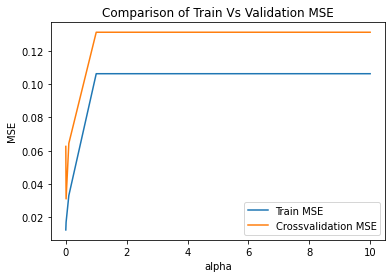

In [67]:
fig,ax=plt.subplots()
ax.plot(alpha,train_score,label="Train MSE")
ax.plot(alpha,val_score,label="Crossvalidation MSE")
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("Comparison of Train Vs Validation MSE")
plt.legend()
plt.show()

**Best Regularization Parameter**

In [75]:
best_alpha=alpha[val_score.index(min(val_score))]
print(f"The regularization parameter with the lowest cross-validation MSE is: {best_alpha}")
print("********************************************************************")
print(f"The lowest cross validation error is {min(val_score):.3f}")

The regularization parameter with the lowest cross-validation MSE is: 0.01
********************************************************************
The lowest cross validation error is 0.031


**Fitting Lasso model with optimal regularization parameter**

In [77]:
lreg=Lasso(alpha=best_alpha,tol=1e-2,max_iter=10000)
lreg.fit(X_std,y_tmp)
y_pred=lreg.predict(X_std)
print(f"The mean squared error on the training data is: {mean_squared_error(y_tmp,y_pred):.2f}")

The mean squared error on the training data is: 0.02


**Converting the predicted y values to the original scale and calculating model performance, that is MSE**

In [80]:
y_true_pred=1/(1+np.exp(-y_pred))*100
print(f"The mean squared error on the training data:{mean_squared_error(y,y_true_pred):.2f}")
print("*********************************************")
print(f"The R-squared of model is: {r2_score(y,y_true_pred):.2f}")

The mean squared error on the training data:8.49
*********************************************
The R-squared of model is: 0.83


**Feature Importance using Lasso model**

In [98]:
ind=np.where(abs(lreg.coef_)>0)
print("The important features making significant contribution to the prediction, having coefficient >0: ")
print("\n")
for ele in ind[0]:
    print(X.columns[ele])

The important features making significant contribution to the prediction, having coefficient >0: 


movement_reactions
mentality_composure
value_eur
international_reputation
skill_long_passing
age
skill_moves
power_strength
physic


**Given there is multicollinearity among the predictors, Lasso regression might tend to zero out the feature coefficients randomly among the correlated features, hence we run a bootstrap analysis for the same**

In [93]:
val_dict={key:0 for key in X.columns}
for i in range(500):
    lreg=Lasso(alpha=0.01,tol=1e-2,max_iter=10000)
    lreg.fit(X_std,y_tmp)
    for j in np.where(abs(lreg.coef_)>0)[0]:
        val_dict[X.columns[j]]+=1  

**Creating a bar plot for feature importance**

Text(0.5, 1.0, 'Frequency distribution of feature importance')

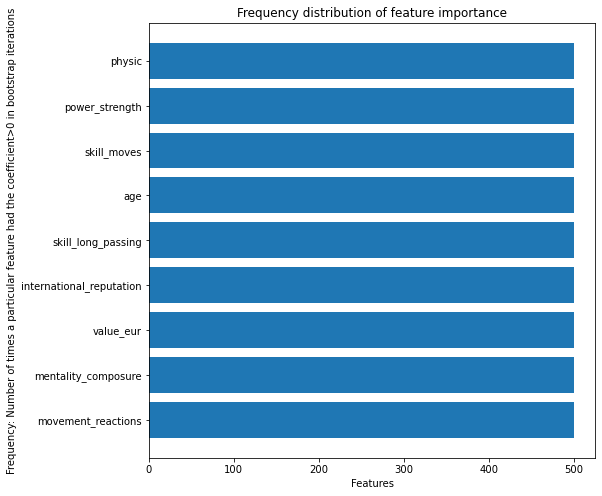

In [104]:
fig,ax=plt.subplots(figsize=(8,8))
keys=[key for key,val in val_dict.items() if val>0]
values=[val for val in val_dict.values() if val>0]
ax.barh(keys,values)
ax.set_xlabel("Features")
ax.set_ylabel("Frequency: Number of times a particular feature had the coefficient>0 in bootstrap iterations")
ax.set_title("Frequency distribution of feature importance")

**Linear Regression with L2 Regularization**

In [114]:
alpha=[0.0001,0.001,0.01,0.1,1,10,50,100,1000]
train_score=[]
val_score=[]
for i in alpha:
    lreg_r=Ridge(alpha=i,tol=1e-2)
    scores=cross_validate(lreg_r,X_std,y_tmp,cv=10,scoring=('neg_mean_squared_error'),return_train_score=True)
    train_score.append(np.mean(abs(scores["train_score"])))
    val_score.append(np.mean(abs(scores["test_score"])))

**Plotting Training versus Cross-validation MSE**

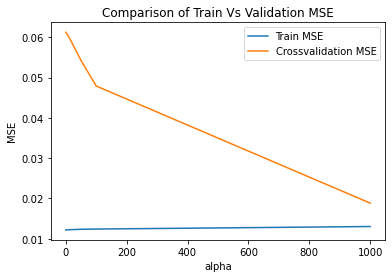

In [115]:
fig,ax=plt.subplots()
ax.plot(alpha,train_score,label="Train MSE")
ax.plot(alpha,val_score,label="Crossvalidation MSE")
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("Comparison of Train Vs Validation MSE")
plt.legend()
plt.show()

**Best Regularization Parameter**

In [116]:
best_alpha=alpha[val_score.index(min(val_score))]
print(f"The regularization parameter with the lowest cross-validation MSE is: {best_alpha}")
print("********************************************************************")
print(f"The lowest cross validation error is {min(val_score):.3f}")


The regularization parameter with the lowest cross-validation MSE is: 1000
********************************************************************
The lowest cross validation error is 0.019


**Fitting Ridge model with optimal regularization parameter**

In [118]:
lreg_r=Ridge(alpha=best_alpha,tol=1e-2)
lreg_r.fit(X_std,y_tmp)
y_pred=lreg_r.predict(X_std)
print(f"The mean squared error on the training data is: {mean_squared_error(y_tmp,y_pred):.2f}")

The mean squared error on the training data is: 0.01


**Converting the predicted y values to the original scale and calculating model performance, that is MSE**

In [119]:
y_true_pred=1/(1+np.exp(-y_pred))*100
print(f"The mean squared error on the training data:{mean_squared_error(y,y_true_pred):.2f}")
print("*********************************************")
print(f"The R-squared of model is: {r2_score(y,y_true_pred):.2f}")

The mean squared error on the training data:6.40
*********************************************
The R-squared of model is: 0.87


**Feature Importance using Ridge model**

In [170]:
ind=np.where(abs(lreg_r.coef_)>0.04)
print("The important features making significant contribution to the prediction, having coefficient >0.02: ")
print("\n")
for ele in ind[0]:
    print(X.columns[ele])

The important features making significant contribution to the prediction, having coefficient >0.02: 


movement_reactions
mentality_composure
value_eur
attacking_short_passing
skill_ball_control
attacking_heading_accuracy


**Creating a bar plot for feature importance**

Text(0.5, 1.0, 'Feature importance of predictors')

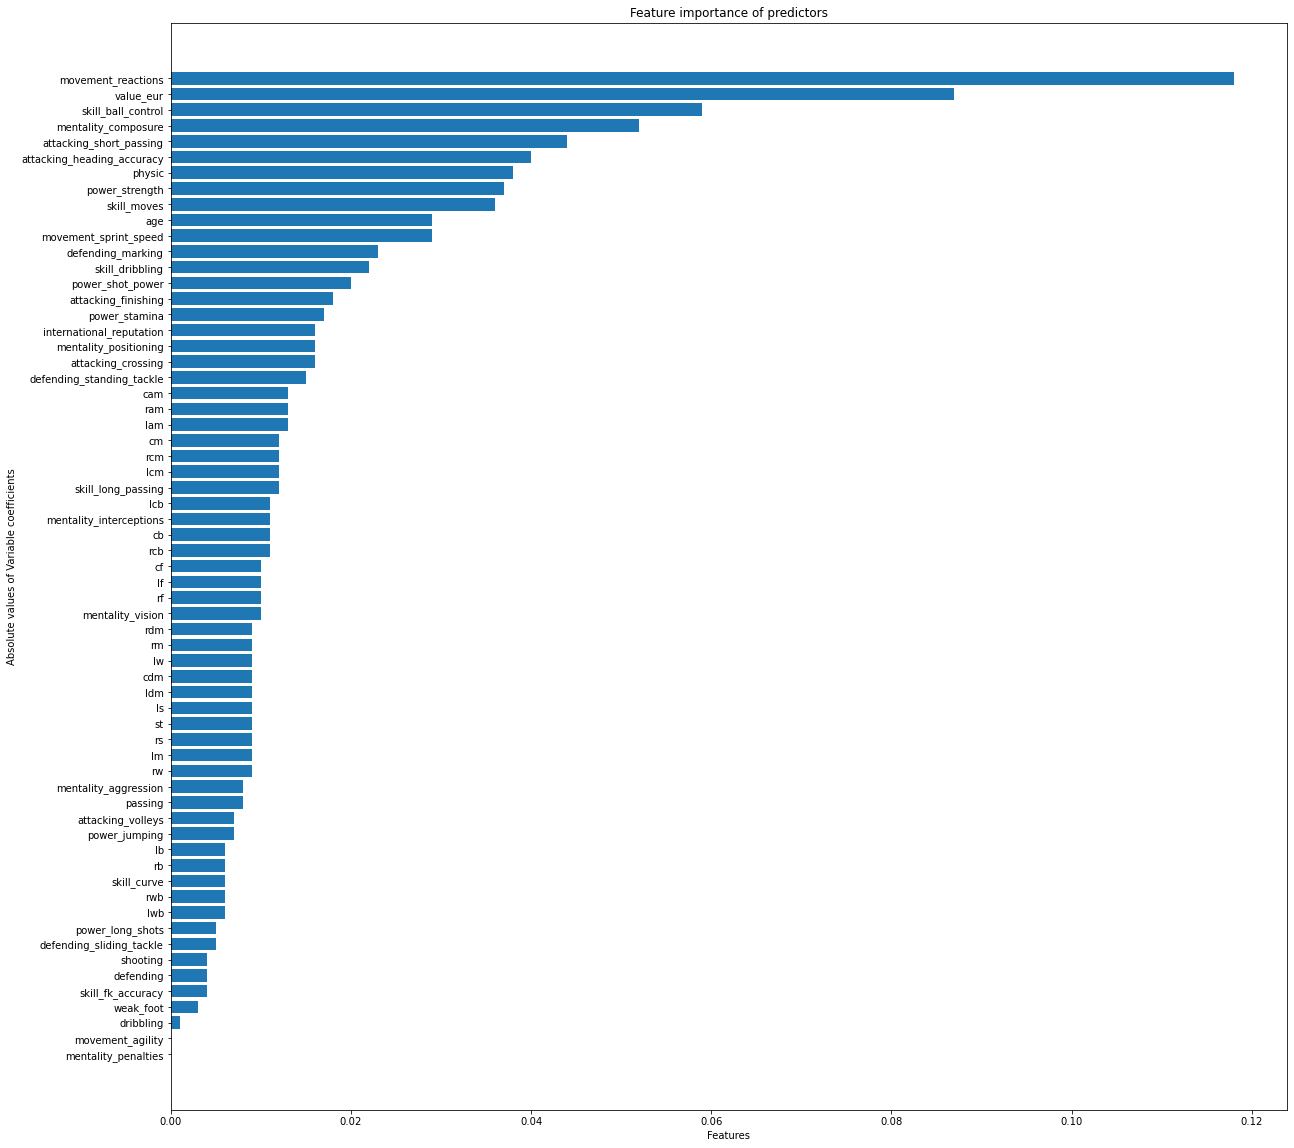

In [169]:
fig,ax=plt.subplots(figsize=(20,20))
keys=list(X.columns[list(np.argsort(abs(np.round(lreg_r.coef_,3))))])
values=list(np.sort(abs(np.round(lreg_r.coef_,3))))
ax.barh(keys,values)
ax.set_xlabel("Features")
ax.set_ylabel("Absolute values of Variable coefficients")
ax.set_title("Feature importance of predictors")

**K-NN Regression**

In [186]:
#here we use the original variable y
k=[5,10,15,25,30,50,80,100]
train_score=[]
val_score=[]
for i in k:
    kreg=KNeighborsRegressor(n_neighbors=i)
    scores=cross_validate(kreg,X_std,y,cv=10,scoring=('neg_mean_squared_error'),return_train_score=True)
    train_score.append(np.mean(abs(scores["train_score"])))
    val_score.append(np.mean(abs(scores["test_score"])))

**Plotting Training versus Cross-validation MSE**

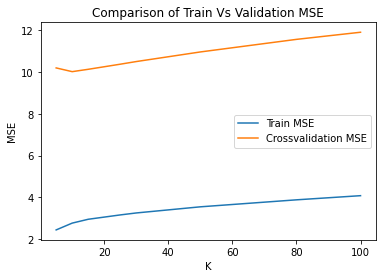

In [188]:
fig,ax=plt.subplots()
ax.plot(k,train_score,label="Train MSE")
ax.plot(k,val_score,label="Crossvalidation MSE")
ax.set_xlabel("K")
ax.set_ylabel("MSE")
ax.set_title("Comparison of Train Vs Validation MSE")
plt.legend()
plt.show()

**Best k hyperparameter**

In [189]:
best_k=k[val_score.index(min(val_score))]
print(f"The k hyper-parameter with the lowest cross-validation MSE is: {best_k}")
print("********************************************************************")
print(f"The lowest cross validation error is {min(val_score):.3f}")

The k hyper-parameter with the lowest cross-validation MSE is: 10
********************************************************************
The lowest cross validation error is 10.016


**Fitting K-NN model model with optimal k hyperparameter**

In [190]:
kreg=KNeighborsRegressor(n_neighbors=best_k)
kreg.fit(X_std,y)
y_pred=kreg.predict(X_std)
print(f"The mean squared error on the training data:{mean_squared_error(y,y_pred):.2f}")
print("*********************************************")
print(f"The R-squared of model is: {r2_score(y,y_pred):.2f}")

The mean squared error on the training data:2.80
*********************************************
The R-squared of model is: 0.94


**K-NN clearly overfits the data and has a lower cross validation MSE compared to other two models above. Additonally, hyperparameter tuning was done using k values of 200,300,400 and 500. However, 10 was selected as the optimal k value. Apart from obove, just for consistency K-N Regression was also performed using logit transformed response variable. The cross validation MSE score was found to be approximately around 0.04, which is in line with the above result.**

**Based on the analysis above and cross-validation MSE scores, we select Logit Ridge regression model as our final model. Also, Ridge regression model takes care of multicollinearity among the predictors. Hence, we conduct our performance of the model on test data**

**Reading the test data**

In [191]:
test_df=pd.read_csv("fifadataset/players_20.csv")
test_df.head()
test_df=test_df[test_df["club"].isin(["FC Barcelona","FC Bayern München","Real Madrid","Paris Saint-Germain","Juventus","Manchester City","Liverpool"])]

**Preprocessing features in the test data**

In [192]:
for col in cols_to_preprocess:
    test_df[col]=test_df[col].apply(preprocess_vals)
test_tmp=test_df[vars_to_keep]

In [193]:
test_tmp=test_tmp.fillna(0)

**Creating predictor variables and response variables**

In [194]:
X_test=test_tmp[vars_to_keep].drop("overall",axis=1)
y_test=test_tmp["overall"]

**Logit transformation of y variable in the test data**

In [195]:
y_1=y_test/100
y_test_tmp=np.log(y_1/(1-y_1))

**Standardizing the features in the test data**

In [196]:
X_test_std=Std.transform(X_test)

**Carrying out the predictions**

In [197]:
y_test_pred=lreg_r.predict(X_test_std)
print(f"The mean squared error of the model:{mean_squared_error(y_test_tmp,y_test_pred):.3f}")

The mean squared error of the model:0.030


**Converting the predicted y values to the original scale and calculating model performance, that is MSE**

In [198]:
y_testtr_pred=1/(1+np.exp(-y_test_pred))*100
print(f"The mean squared error on the test data:{mean_squared_error(y_test,y_testtr_pred):.2f}")
print("*********************************************")
print(f"The R-squared of model is: {r2_score(y_test,y_testtr_pred)*100:.2f}%")

The mean squared error on the test data:3.99
*********************************************
The R-squared of model is: 95.38%


# Part B - Classify player position<a id="partB"></a>

> <span style="color:brown">*Can a professional defender become a forward?*</span>

- Train on data from FIFA 19. Predict the player_position variable using other skill statistics for players in the FIFA 20 Edition. Train on all players from FIFA 19

- Graphically represent the predicted player_position for the players in Test Set 

### Details : 

- Sofifa Id, URL, Wage, Salary, Name, Real face, URL variables cannot be used during the prediction or learning. *

- The final score will be assigned using Classification accuracy

- Test Set: Players from the following Clubs 

  - FC Barcelona

  - FC Bayern München

  - Real Madrid 

  - Paris Saint-Germain

  - Juventus

  - Atlético Madrid

  - Manchester City

  - Liverpool 

  - Manchester United

## Train and Test Dataset Loading

In [2]:
# Importing players_19.csv file which is our Training Dataset
train_df = pd.read_csv('fifadataset/players_19.csv')
train_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,127100000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Diver, Flair, Long Shot Taker...",84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,94,94,110500000,565000,"CF, RW, ST",Left,5,4,4,Medium/Medium,Messi,Yes,226500000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,10.0,NaN,2004-07-01,2021.0,CF,10.0,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,90+2,84+2,84+2,84+2,90+2,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,228100000.0,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Selfish, Flair, Speed Dribbler (CPU AI ...",79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,91,93,72000000,260000,GK,Right,4,3,1,Medium/Medium,Lean,Yes,138600000.0,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,94.0,58.0,88.0,"GK Long Throw, Saves with Feet",17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,91,92,102000000,355000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,196400000.0,"#Dribbler, #Playmaker , #Eng

In [3]:
# Checking shape of Train Data

print(f'Train Data Shape:')
print(f'Total Rows: {train_df.shape[0]}')
print(f'Total Columns: {train_df.shape[1]}')

Train Data Shape:
Total Rows: 17770
Total Columns: 104


In [4]:
# Importing players_20.csv file which is our Test Dataset
test_df = pd.read_csv('fifadataset/players_20.csv')
test_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [5]:
# Checking shape of Test Data

print(f'Test Data Shape:')
print(f'Total Rows: {test_df.shape[0]}')
print(f'Total Columns: {test_df.shape[1]}')

Test Data Shape:
Total Rows: 18278
Total Columns: 104


In [6]:
# Making a list of football clubs for which the prediction is to be made
clubs_of_interest = ['FC Barcelona', 'FC Bayern München', 'Real Madrid', 'Paris Saint-Germain', 'Juventus', 'Atlético Madrid',
                     'Manchester City', 'Liverpool', 'Manchester United']

In [7]:
# Filtering the Test data to include only the football clubs for which the prediction is to be made
test_df = test_df[test_df['club'].isin(clubs_of_interest)]
test_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [8]:
# Checking shape of Test Data after selecting the desired clubs

print(f'Test Data Shape after selecting only the desired clubs:')
print(f'Total Rows: {test_df.shape[0]}')
print(f'Total Columns: {test_df.shape[1]}')

Test Data Shape after selecting only the desired clubs:
Total Rows: 287
Total Columns: 104


## Train and Test Dataset Cleaning and Preprocessing

In [9]:
# Making a list of all the column names that are not useful for Training and Prediction

unusable_cols = ['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'nationality', 'club', 'value_eur',
                 'wage_eur', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags',
                 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position',
                 'nation_jersey_number', 'player_traits']

In [10]:
# Checking number of unique values in 'body_type', 'team_position', 'nation_position' columns
for val in ['body_type', 'team_position', 'nation_position']:
    print(f"Number of Unique values in column='{val}' : {train_df[val].unique()}. Total : {train_df[val].nunique()} values.")
    print()

Number of Unique values in column='body_type' : ['C. Ronaldo' 'Messi' 'Neymar' 'Lean' 'Normal' 'Courtois' 'Stocky'
 'PLAYER_BODY_TYPE_25' 'Shaqiri' 'Akinfenwa']. Total : 10 values.

Number of Unique values in column='team_position' : ['LW' 'RW' 'CAM' 'GK' 'RCM' 'LCB' 'ST' 'LCM' 'SUB' 'RS' 'RM' 'CDM' 'LB'
 'RCB' 'CM' 'LM' 'CF' 'RB' 'CB' 'LS' 'LDM' 'LF' 'RDM' 'LAM' 'RAM' 'RF' nan
 'RWB' 'RES' 'LWB']. Total : 29 values.

Number of Unique values in column='nation_position' : ['LS' 'CF' 'LW' 'GK' 'RCM' 'LCB' nan 'LF' 'SUB' 'RCB' 'LDM' 'CAM' 'RS'
 'RDM' 'RM' 'ST' 'CDM' 'RF' 'LB' 'RW' 'LCM' 'RB' 'CB' 'LM' 'CM' 'RAM'
 'RWB' 'LWB' 'LAM']. Total : 28 values.



- It is already given in the instructions that **Sofifa Id, URL, Wage, Salary, Name, Real face, URL** variables cannot be used during the prediction or learning. Therefore, these columns have been considered as unusable columns by default.<br><br>

- In addition to the columns mentioned in the previous point, we have considered the following columns as irrelevant to the problem at hand, which is to predict a player's position in the field, for the reasons stated below:<br><br>

  - **'age', 'dob', 'nationality', 'club', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_jersey_number':** Because from the domain knowledge, these factors don't logically address the problem.<br><br>
  
  - **'work_rate', 'body_type':** These two variables are very specific to the Fifa video game and also adds to the increase in dimensionality of the problem if included.<br><br>
  
  - **'player_tags', 'player_traits':** These variables would have helped in prediction of the player's position but these variables require some Natural Language Processing techniques, as we have understood from various literatures available online, which we are not familiar with and are out of the scope of this problem.<br><br>
  
  - **'team_position', 'nation_position':** These two variables are helpful predictors but they have high cardinality and adds to the increase in dimensionality of the problem if included. Furthermore, there are somewhat similar variables already part of the dataset such as 'ls', 'st' etc. which convey the same information in a sense and in a quantified manner.

### Dropping the Unusable Columns from Train and Test Dataset and Checking the Data Type and Missing Values in each column

In [11]:
# Dropping the unusable_cols from the train_df
train_df_usable = train_df.drop(unusable_cols, axis=1)
train_df_usable

,height_cm,weight_kg,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,187,83,94,94,"ST, LW",Right,5,4,5,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,170,72,94,94,"CF, RW, ST",Left,5,4,4,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,90+2,84+2,84+2,84+2,90+2,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,175,68,92,93,"LW, CAM",Right,5,5,5,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193,76,91,93,GK,Right,4,3,1,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,94.0,58.0,88.0,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,181,70,91,92,"CAM, CM",Right,4,5,4,77.0,86.0,92.0,87.0,60.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,93,83,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,60,87,94,79,88,67,58,51,15,13,5,10,13,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17765,180,72,47,61,"CM, CDM",Right,1,3,2,52.0,32.0,46.0,45.0,46.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,31,26,49,55,31,44,30,31,50,41,55,49,51,53,65,46,60,44,49,28,51,49,31,51,40,35,41,44,53,11,6,13,11,8,40+2,40+2,40+2,42+2,42+2,42+2,42+2,42+2,44+2,44+2,44+2,43+2,46+2,46+2,46+2,43+2,46+2,48+2,48+2,48+2,46+2,46+2,48+2,48+2,48+2,46+2
17766,178,75,47,61,ST,Right,1,3,2,64.0,43.0,40.0,52.0,23.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,37,48,30,45,43,50,41,38,30,51,62,66,67,39,70,38,81,55,60,35,28,25,43,41,48,37,28,15,22,15,5,14,12,8,45+2,45+2,45+2,48+2,46+2,46+2,46+2,48+2,46+2,46+2,46+2,47+2,40+2,40+2,40+2,47+2,38+2,34+2,34+2,34+2,38+2,36+2,32+2,32+2,32+2,36+2
17767,181,64,47,61,CM,Right,1,3,2,81.0,35.0,47.0,49.0,44.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,40,27,45,58,35,46,39,37,47,42,84,78,78,45,70,48,59,58,45,35,58,41,48,40,36,39,54,37,40,5,12,14,14,11,45+2,45+2,45+2,48+2,47+2,47+2,47+2,48+2,48+2,48+2,48+2,49+2,46+2,46+2,46+2,49+2,49+2,46+2,46+2,46+2,49+2,49+2,46+2,46+2,46+2,49+2
17768,179,73,47,59,RB,Right,1,3,2,63.0,42.0,38.0,50.0,41.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,39,40,45,46,42,46,35,29,22,49,65,62,68,44,70,44,69,61,5

In [12]:
# checking the shape of Train Data after dropping the unusable_cols

print(f'Train Data Shape after dropping the unusable_cols:')
print(f'Total Rows: {train_df_usable.shape[0]}')
print(f'Total Columns: {train_df_usable.shape[1]}')

Train Data Shape after dropping the unusable_cols:
Total Rows: 17770
Total Columns: 81


In [13]:
# Checking the data types of the columns that remain in the Train Data after filtering out the unusable_cols
train_df_usable.dtypes

height_cm                       int64
weight_kg                       int64
overall                         int64
potential                       int64
player_positions               object
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
gk_diving                     float64
gk_handling                   float64
gk_kicking                    float64
gk_reflexes                   float64
gk_speed                      float64
gk_positioning                float64
attacking_crossing             object
attacking_finishing            object
attacking_heading_accuracy     object
attacking_short_passing        object
attacking_volleys              object
skill_dribbl

**We can observe that:**
- **There are 19 numerical columns.**
- **There are 62 non-numerical or object columns. We need to process them to be able to feed to a machine learning model.**

In [14]:
# Checking the percentage of missing values in all the columns of the Train Data
100 * (train_df_usable.isnull().sum() / train_df_usable.shape[0])

height_cm                      0.00000
weight_kg                      0.00000
overall                        0.00000
potential                      0.00000
player_positions               0.00000
preferred_foot                 0.00000
international_reputation       0.00000
weak_foot                      0.00000
skill_moves                    0.00000
pace                          11.17614
shooting                      11.17614
passing                       11.17614
dribbling                     11.17614
defending                     11.17614
physic                        11.17614
gk_diving                     88.82386
gk_handling                   88.82386
gk_kicking                    88.82386
gk_reflexes                   88.82386
gk_speed                      88.82386
gk_positioning                88.82386
attacking_crossing             0.00000
attacking_finishing            0.00000
attacking_heading_accuracy     0.00000
attacking_short_passing        0.00000
attacking_volleys        

- **There are 38 columns with missing values.**<br><br>

- Out of the 38 columns, **32 columns with 11.18% missing values have values missing in the same rows**. Exploration of the data revealed that all of these players play at goalkeeper position (GK). And the 32 columns that have the data missing for these players contain stats that does not apply to the goalkeepers (GK).
  - **To treat these missing values, we have decided to replace them by _'-1'_.**
  - Why _'-1'_?
    - Because it differentiates this quantity from the remaining skill quantities , that are positive and range from 0-100.
    - This also helps in interpretability that this stat is not applicable to the corresponding player.
  - Why not _'0'_?
    - Because a _'0'_ would have meant that the corresponding player has no skill in that category. Whereas, a player can have some skill in that category. It is just that a player does not play at a particular position and hence that stat is not applicable on him/her.
    - A _'0'_ would not have helped in interpretability that this stat is not applicable to the corresponding player.<br><br>

- Out of the 38 columns, **6 columns with 88.82% missing values have values missing in the same rows**. Exploration of the data revealed that all of these players play at non-goalkeeper position (example, ST, LW etc.). And the 6 columns that have the data missing for these players contain stats that apply to the goalkeepers (GK).
  - **To treat these missing values, we have again decided to replace them by _'-1'_ for the same reasons stated above.**

In [15]:
# Dropping the unusable_cols from the test_df
test_df_usable = test_df.drop(unusable_cols, axis=1)
test_df_usable.head()

,height_cm,weight_kg,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,170,72,94,94,"RW, CF, ST",Left,5,4,4,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,187,83,93,93,"ST, LW",Right,5,4,5,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,175,68,92,92,"LW, CAM",Right,5,5,5,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,188,87,91,93,GK,Right,3,3,1,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,175,74,91,91,"LW, CF",Right,4,4,4,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [16]:
# checking the shape of Test Data after dropping the unusable_cols

print(f'Test Data Shape after dropping the unusable_cols:')
print(f'Total Rows: {test_df_usable.shape[0]}')
print(f'Total Columns: {test_df_usable.shape[1]}')

Test Data Shape after dropping the unusable_cols:
Total Rows: 287
Total Columns: 81


In [17]:
# Checking the data types of the columns that remain in the Test Data after filtering out the unusable_cols
test_df_usable.dtypes

height_cm                       int64
weight_kg                       int64
overall                         int64
potential                       int64
player_positions               object
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
gk_diving                     float64
gk_handling                   float64
gk_kicking                    float64
gk_reflexes                   float64
gk_speed                      float64
gk_positioning                float64
attacking_crossing              int64
attacking_finishing             int64
attacking_heading_accuracy      int64
attacking_short_passing         int64
attacking_volleys               int64
skill_dribbl

**We can observe that:**
- **There are 53 numerical columns.**
- **There are 28 non-numerical or object columns. We need to process them to be able to feed to a machine learning model.**

In [18]:
# Checking the percentage of missing values in all the columns of the Test Data
100 * (test_df_usable.isnull().sum() / test_df_usable.shape[0])

height_cm                      0.000000
weight_kg                      0.000000
overall                        0.000000
potential                      0.000000
player_positions               0.000000
preferred_foot                 0.000000
international_reputation       0.000000
weak_foot                      0.000000
skill_moves                    0.000000
pace                          10.801394
shooting                      10.801394
passing                       10.801394
dribbling                     10.801394
defending                     10.801394
physic                        10.801394
gk_diving                     89.198606
gk_handling                   89.198606
gk_kicking                    89.198606
gk_reflexes                   89.198606
gk_speed                      89.198606
gk_positioning                89.198606
attacking_crossing             0.000000
attacking_finishing            0.000000
attacking_heading_accuracy     0.000000
attacking_short_passing        0.000000


- **There are 38 columns with missing values.**<br><br>

- Out of the 38 columns, **32 columns with 10.80% missing values have values missing in the same rows**. Exploration of the data revealed that all of these players play at goalkeeper position (GK). And the 32 columns that have the data missing for these players contain stats that does not apply to the goalkeepers (GK).
  - **To treat these missing values, we have decided to replace them by _'-1'_.**
  - Why _'-1'_?
    - Because it differentiates this quantity from the remaining skill quantities , that are positive and range from 0-100.
    - This also helps in interpretability that this stat is not applicable to the corresponding player.
  - Why not _'0'_?
    - Because a _'0'_ would have meant that the corresponding player has no skill in that category. Whereas, a player can have some skill in that category. It is just that a player does not play at a particular position and hence that stat is not applicable on him/her.
    - A _'0'_ would not have helped in interpretability that this stat is not applicable to the corresponding player.<br><br>

- Out of the 38 columns, **6 columns with 89.20% missing values have values missing in the same rows**. Exploration of the data revealed that all of these players play at non-goalkeeper position (example, ST, LW etc.). And the 6 columns that have the data missing for these players contain stats that apply to the goalkeepers (GK).
  - **To treat these missing values, we have again decided to replace them by _'-1'_ for the same reasons stated above.**

### Functions to Fill the Missing Values and Preprocess the Columns to Type Cast them into Quantitative Columns

In [19]:
# Function to split a string by the specified character 'char' and also clean the string if a 'flag' is set
def split(x, char, flag=0):
    
    # If flag is set, then that means the passed string contains numbers and other special characters.
    # So, we need to extract only the numbers from the string, and then type cast a particular number from string to float.
    if flag == 1:
        # Regular expression library is used to extract only the numbers from 0-9 in a string
        s = re.sub(r'[^0-9]', ' ',x).split(char)[0]
        if s == '':
            return -1.0
        else:
            return float(s)
    
    # If flag is not set, then simply split the string on the specified character 'char' and return the list
    return x.split(char)

In [20]:
# Function to preprocess the Columns, type cast the object data type columns to quantitative columns and fill the missing values
def preprocess(df):
    tmp = df.copy()
    
    # splitting the each entry of the 'player_positions' column by ',' and saving in a list
    tmp['player_positions'] = tmp['player_positions'].map(lambda x: split(str(x), ','))
    
    # one-hot encoding the 'preferred_foot' column and dropping the first and 'preferred_foot' column after that
    tmp = pd.concat([tmp, pd.get_dummies(df['preferred_foot'], prefix='preferred_foot')], axis=1)
    tmp = tmp.drop(['preferred_foot', 'preferred_foot_Left'], axis=1)

    # tmp['work_rate'] = tmp['work_rate'].map(lambda x: split(str(x), '/'))

    # tmp['team_position'] = tmp['team_position'].fillna('Undefined')

    # list of columns that need missing value treatment and also type casting treatment from object to quantitative
    missing_num_cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
           'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
           'gk_positioning', 'attacking_crossing', 'attacking_finishing',
           'attacking_heading_accuracy', 'attacking_short_passing',
           'attacking_volleys', 'skill_dribbling', 'skill_curve',
           'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
           'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
           'movement_reactions', 'movement_balance', 'power_shot_power',
           'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
           'mentality_aggression', 'mentality_interceptions',
           'mentality_positioning', 'mentality_vision', 'mentality_penalties',
           'mentality_composure', 'defending_marking', 'defending_standing_tackle',
           'defending_sliding_tackle', 'goalkeeping_diving',
           'goalkeeping_handling', 'goalkeeping_kicking',
           'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
           'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
           'lcb', 'cb', 'rcb', 'rb']
    
    # filling the missing values by '-1'
    tmp[missing_num_cols] = tmp[missing_num_cols].fillna(-1)

    # treating the columns that contain strings which have numbers and other special characters.
    for col in missing_num_cols[12:]:
        tmp[col] = tmp[col].map(lambda x: split(str(x), ' ', flag=1))
        
    return tmp

### Train Dataset Cleaning and Preprocessing

In [21]:
# calling the 'preprocess' function to treat the Train Data
train_df_usable = preprocess(train_df_usable)
train_df_usable.head()

,height_cm,weight_kg,overall,potential,player_positions,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,preferred_foot_Right
0,187,83,94,94,"[ST, LW]",5,4,5,90.0,93.0,81.0,89.0,35.0,79.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,1
1,170,72,94,94,"[CF, RW, ST]",5,4,4,88.0,91.0,88.0,96.0,32.0,61.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,77.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,90.0,84.0,84.0,84.0,90.0,63.0,61.0,61.0,61.0,63.0,58.0,47.0,47.0,47.0,58.0,0
2,175,68,92,93,"[LW, CAM]",5,5,5,92.0,84.0,83.0,95.0,32.0,59.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,1
3,193,76,91,93,[GK],4,3,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,90.0,85.0,87.0,94.0,58.0,88.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
4,181,70,91,92,"[CAM, CM]",4,5,4,77.0,86.0,92.0,87.0,60.0,78.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,93.0,83.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,60.0,87.0,94.0,79.0,88.0,67.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,1


In [22]:
# Checking the percentage of missing values in all the columns of the Train Data after preprocessing
100 * (train_df_usable.isnull().sum() / train_df_usable.shape[0])

height_cm                     0.0
weight_kg                     0.0
overall                       0.0
potential                     0.0
player_positions              0.0
international_reputation      0.0
weak_foot                     0.0
skill_moves                   0.0
pace                          0.0
shooting                      0.0
passing                       0.0
dribbling                     0.0
defending                     0.0
physic                        0.0
gk_diving                     0.0
gk_handling                   0.0
gk_kicking                    0.0
gk_reflexes                   0.0
gk_speed                      0.0
gk_positioning                0.0
attacking_crossing            0.0
attacking_finishing           0.0
attacking_heading_accuracy    0.0
attacking_short_passing       0.0
attacking_volleys             0.0
skill_dribbling               0.0
skill_curve                   0.0
skill_fk_accuracy             0.0
skill_long_passing            0.0
skill_ball_con

**We can observe that after preprocessing, there are no missing values in any columns.**

In [23]:
# Checking the data types of the columns in the Train Data after preprocessing
train_df_usable.dtypes

height_cm                       int64
weight_kg                       int64
overall                         int64
potential                       int64
player_positions               object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
gk_diving                     float64
gk_handling                   float64
gk_kicking                    float64
gk_reflexes                   float64
gk_speed                      float64
gk_positioning                float64
attacking_crossing            float64
attacking_finishing           float64
attacking_heading_accuracy    float64
attacking_short_passing       float64
attacking_volleys             float64
skill_dribbling               float64
skill_curve 

- **We can observe that apart from _'player_positions'_ which is our response variable, every column has now been transformed into a numerical column that can be easily fed to a machine learning model.**<br><br>

- **We need to one-hot encode the _'player_positions'_ column before feeding the data to a model.**

### Test Dataset Cleaning and Preprocessing

In [24]:
# calling the 'preprocess' function to treat the Test Data
test_df_usable = preprocess(test_df_usable)
test_df_usable.head()

,height_cm,weight_kg,overall,potential,player_positions,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,preferred_foot_Right
0,170,72,94,94,"[RW, CF, ST]",5,4,4,87.0,92.0,92.0,96.0,39.0,66.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,88.0,95.0,70.0,92.0,88.0,97.0,93.0,94.0,92.0,96.0,91.0,84.0,93.0,95.0,95.0,86.0,68.0,75.0,68.0,94.0,48.0,40.0,94.0,94.0,75.0,96.0,33.0,37.0,26.0,6.0,11.0,15.0,14.0,8.0,89.0,89.0,89.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,92.0,87.0,87.0,87.0,92.0,68.0,66.0,66.0,66.0,68.0,63.0,52.0,52.0,52.0,63.0,0
1,187,83,93,93,"[ST, LW]",5,4,5,90.0,93.0,82.0,89.0,35.0,78.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,84.0,94.0,89.0,83.0,87.0,89.0,81.0,76.0,77.0,92.0,89.0,91.0,87.0,96.0,71.0,95.0,95.0,85.0,78.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,1
2,175,68,92,92,"[LW, CAM]",5,5,5,91.0,85.0,87.0,95.0,32.0,58.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,87.0,87.0,62.0,87.0,87.0,96.0,88.0,87.0,81.0,95.0,94.0,89.0,96.0,92.0,84.0,80.0,61.0,81.0,49.0,84.0,51.0,36.0,87.0,90.0,90.0,94.0,27.0,26.0,29.0,9.0,9.0,15.0,15.0,11.0,84.0,84.0,84.0,90.0,89.0,89.0,89.0,90.0,90.0,90.0,90.0,89.0,82.0,82.0,82.0,89.0,66.0,61.0,61.0,61.0,66.0,61.0,46.0,46.0,46.0,61.0,1
3,188,87,91,93,[GK],3,3,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,87.0,92.0,78.0,89.0,52.0,90.0,13.0,11.0,15.0,43.0,13.0,12.0,13.0,14.0,40.0,30.0,43.0,60.0,67.0,88.0,49.0,59.0,78.0,41.0,78.0,12.0,34.0,19.0,11.0,65.0,11.0,68.0,27.0,12.0,18.0,87.0,92.0,78.0,90.0,89.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
4,175,74,91,91,"[LW, CF]",4,4,4,91.0,83.0,86.0,94.0,35.0,66.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,81.0,84.0,61.0,89.0,83.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,84.0,63.0,80.0,54.0,41.0,87.0,89.0,88.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,83.0,83.0,83.0,89.0,88.0,88.0,88.0,89.0,89.0,89.0,89.0,89.0,83.0,83.0,83.0,89.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,1


In [25]:
# Checking the percentage of missing values in all the columns of the Test Data after preprocessing
100 * (test_df_usable.isnull().sum() / test_df_usable.shape[0])

height_cm                     0.0
weight_kg                     0.0
overall                       0.0
potential                     0.0
player_positions              0.0
international_reputation      0.0
weak_foot                     0.0
skill_moves                   0.0
pace                          0.0
shooting                      0.0
passing                       0.0
dribbling                     0.0
defending                     0.0
physic                        0.0
gk_diving                     0.0
gk_handling                   0.0
gk_kicking                    0.0
gk_reflexes                   0.0
gk_speed                      0.0
gk_positioning                0.0
attacking_crossing            0.0
attacking_finishing           0.0
attacking_heading_accuracy    0.0
attacking_short_passing       0.0
attacking_volleys             0.0
skill_dribbling               0.0
skill_curve                   0.0
skill_fk_accuracy             0.0
skill_long_passing            0.0
skill_ball_con

**We can observe that after preprocessing, there are no missing values in any columns.**

In [26]:
# Checking the data types of the columns in the Test Data after preprocessing
test_df_usable.dtypes

height_cm                       int64
weight_kg                       int64
overall                         int64
potential                       int64
player_positions               object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
gk_diving                     float64
gk_handling                   float64
gk_kicking                    float64
gk_reflexes                   float64
gk_speed                      float64
gk_positioning                float64
attacking_crossing            float64
attacking_finishing           float64
attacking_heading_accuracy    float64
attacking_short_passing       float64
attacking_volleys             float64
skill_dribbling               float64
skill_curve 

- **We can observe that apart from _'player_positions'_ which is our response variable, every column has now been transformed into a numerical column that can be easily fed to a machine learning model.**<br><br>

- **We need to one-hot encode the _'player_positions'_ column before feeding the data to a model.**

### One-Hot Encoding the _'player_positions'_ column in Train and Test Data

In [27]:
# Finding out the list of unique 'player_positions' in Train Data
train_unique_player_positions = []

for positions in train_df_usable['player_positions']:
    for val in positions:
        if not(val.strip() in train_unique_player_positions):
            train_unique_player_positions.append(val.strip())

In [28]:
print(f"List of unique 'player_positions' in Train Data : {train_unique_player_positions}")

List of unique 'player_positions' in Train Data : ['ST', 'LW', 'CF', 'RW', 'CAM', 'GK', 'CM', 'CB', 'CDM', 'RM', 'LB', 'LM', 'RB', 'RWB', 'LWB']


In [29]:
# Finding out the list of unique 'player_positions' in Test Data
test_unique_player_positions = []

for positions in test_df_usable['player_positions']:
    for val in positions:
        if not(val.strip() in test_unique_player_positions):
            test_unique_player_positions.append(val.strip())

In [30]:
print(f"List of unique 'player_positions' in Test Data : {test_unique_player_positions}")

List of unique 'player_positions' in Test Data : ['RW', 'CF', 'ST', 'LW', 'CAM', 'GK', 'CM', 'CB', 'CDM', 'LM', 'LB', 'RB', 'RM', 'RWB', 'LWB']


In [31]:
# comparing the set of unique 'player_positions' in Train and Test Data to check whether both sets are same
# or are there some differences

if set(train_unique_player_positions) == set(test_unique_player_positions):
    print("The set of unique 'player_positions' in Train and Test Data are SAME.")
else:
    print("The set of unique 'player_positions' in Train and Test Data are DIFFERENT.")

The set of unique 'player_positions' in Train and Test Data are SAME.


- **Since the set of unique 'player_positions' in Train and Test Data are SAME, we need not drop any of the player position from any of the dataset.**<br><br>

- **The number of different classes in both the Train and Test Data are same, so our model can learn on the Train Data and predict for the Test Data. Had there been some differences, we would have to drop few of the classes.**

In [32]:
# Defining the list of predictor and response variables
predictor_cols = ['height_cm', 'weight_kg', 'overall', 'potential',
       'international_reputation', 'preferred_foot_Right', 'weak_foot', 'skill_moves', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb']

response_cols = ['ST', 'LW', 'CF', 'RW', 'CAM', 'LM', 'CM', 'RM', 'LWB', 'CDM', 'RWB', 'LB', 'CB',
        'RB', 'GK']

In [33]:
# One-Hot encoding the unique 'player_positions' in Train Data
y_train = pd.DataFrame(dict(zip(response_cols, [np.zeros(train_df_usable.shape[0], dtype=int)]*len(response_cols))), index=train_df_usable.index)

for idx, positions in zip(train_df_usable.index, train_df_usable['player_positions']):
    for val in positions:
        y_train.loc[idx, val.strip()] = 1

In [34]:
# One-Hot encoded unique 'player_positions' in Train Data
y_train.head()

,ST,LW,CF,RW,CAM,LM,CM,RM,LWB,CDM,RWB,LB,CB,RB,GK
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [35]:
# One-Hot encoding the unique 'player_positions' in Test Data
y_test = pd.DataFrame(dict(zip(response_cols, [np.zeros(test_df_usable.shape[0], dtype=int)]*len(response_cols))), index=test_df_usable.index)

for idx, positions in zip(test_df_usable.index, test_df_usable['player_positions']):
    for val in positions:
        y_test.loc[idx, val.strip()] = 1

In [36]:
# One-Hot encoded unique 'player_positions' in Test Data
y_test.head()

,ST,LW,CF,RW,CAM,LM,CM,RM,LWB,CDM,RWB,LB,CB,RB,GK
0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


### Function to Plot Percentage of observations of each Class (that is, '0' and '1') across different Player Positions in Train and Test Data

In [37]:
def plot_class_instances(y):
    target_cols = list(y.columns)
    false_class_instance_perc = []
    true_class_instance_perc = []
    
    for col in target_cols:
        false_class_instance_perc.append(100*(y[col].value_counts()/y.shape[0])[0])
        true_class_instance_perc.append(100*(y[col].value_counts()/y.shape[0])[1])
    
    # Plotting bar plots of Flase Class and True Class to check whether whether classes are balanced or imbalanced

    # Numbers of pairs of bars you want
    N = len(target_cols)

    # Data on X-axis

    # Specify the values of blue bars (height)
    blue_bar = false_class_instance_perc
    # Specify the values of orange bars (height)
    orange_bar = true_class_instance_perc

    # Position of bars on x-axis
    ind = np.arange(N)

    # Figure size
    plt.figure(figsize=(15,8))

    # Width of a bar 
    width = 0.3       

    # Plotting
    plt.bar(ind, blue_bar , width, label='Class "0"')
    plt.bar(ind + width, orange_bar, width, label='Class "1"')

    plt.xlabel('Player Positions')
    plt.ylabel('Percentage of Observations')
    plt.title('Percentage of observations of each Class across different Player Positions')

    # xticks()
    # First argument - A list of positions at which ticks should be placed
    # Second argument -  A list of labels to place at the given locations
    plt.xticks(ind + width / 2, target_cols, rotation=45)

    # Finding the best position for legends and putting it
    plt.legend(loc='best')
    plt.show()

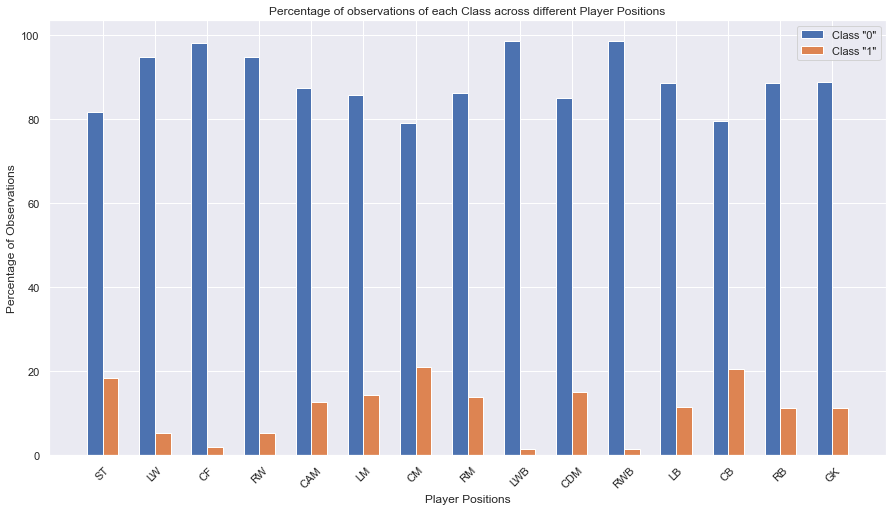

In [38]:
# Plotting the Percentage of observations of each Class across different Player Positions in Train Data
plot_class_instances(y_train)

**We can observe that the Train Data is extremely imbalanced. So, we need to take care of this issue while modelling our classifiers such that they are able to train on this imbalanced dataset without getting affected by this problem.**

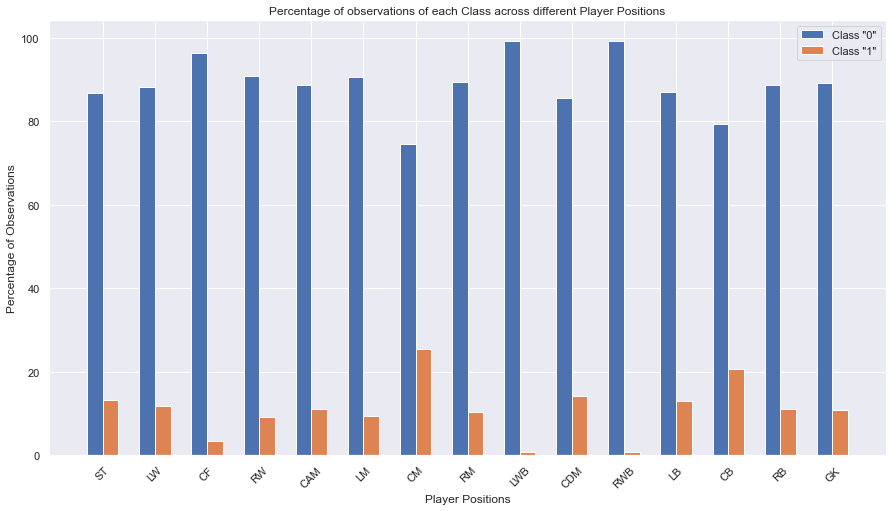

In [39]:
# Plotting the Percentage of observations of each Class across different Player Positions in Test Data
plot_class_instances(y_test)

**We can observe a similar story in Test Data that we observed in Train Data. Test Data is extremely imbalanced as well. So, we need to take care of this issue while calculating metrics for our classifiers.**

## Building the Final Train and Test Data that can be directly fed to a model

In [40]:
# Dropping the 'player_positions' column and concatenating the One-Hot encoded unique 'player_positions' to the final Train Data
train_df_final = pd.concat([train_df_usable.drop('player_positions', axis=1), y_train], axis=1)
train_df_final.head()

,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,preferred_foot_Right,ST,LW,CF,RW,CAM,LM,CM,RM,LWB,CDM,RWB,LB,CB,RB,GK
0,187,83,94,94,5,4,5,90.0,93.0,81.0,89.0,35.0,79.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,170,72,94,94,5,4,4,88.0,91.0,88.0,96.0,32.0,61.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,77.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,90.0,84.0,84.0,84.0,90.0,63.0,61.0,61.0,61.0,63.0,58.0,47.0,47.0,47.0,58.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,175,68,92,93,5,5,5,92.0,84.0,83.0,95.0,32.0,59.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,193,76,91,93,4,3,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,90.0,85.0,87.0,94.0,58.0,88.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,181,70,91,92,4,5,4,77.0,86.0,92.0,87.0,60.0,78.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,93.0,83.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,60.0,87.0,94.0,79.0,88.0,67.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [41]:
# Dropping the 'player_positions' column and concatenating the One-Hot encoded unique 'player_positions' to the final Test Data
test_df_final = pd.concat([test_df_usable.drop('player_positions', axis=1), y_test], axis=1)
test_df_final.head()

,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,preferred_foot_Right,ST,LW,CF,RW,CAM,LM,CM,RM,LWB,CDM,RWB,LB,CB,RB,GK
0,170,72,94,94,5,4,4,87.0,92.0,92.0,96.0,39.0,66.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,88.0,95.0,70.0,92.0,88.0,97.0,93.0,94.0,92.0,96.0,91.0,84.0,93.0,95.0,95.0,86.0,68.0,75.0,68.0,94.0,48.0,40.0,94.0,94.0,75.0,96.0,33.0,37.0,26.0,6.0,11.0,15.0,14.0,8.0,89.0,89.0,89.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,92.0,87.0,87.0,87.0,92.0,68.0,66.0,66.0,66.0,68.0,63.0,52.0,52.0,52.0,63.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,187,83,93,93,5,4,5,90.0,93.0,82.0,89.0,35.0,78.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,84.0,94.0,89.0,83.0,87.0,89.0,81.0,76.0,77.0,92.0,89.0,91.0,87.0,96.0,71.0,95.0,95.0,85.0,78.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,175,68,92,92,5,5,5,91.0,85.0,87.0,95.0,32.0,58.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,87.0,87.0,62.0,87.0,87.0,96.0,88.0,87.0,81.0,95.0,94.0,89.0,96.0,92.0,84.0,80.0,61.0,81.0,49.0,84.0,51.0,36.0,87.0,90.0,90.0,94.0,27.0,26.0,29.0,9.0,9.0,15.0,15.0,11.0,84.0,84.0,84.0,90.0,89.0,89.0,89.0,90.0,90.0,90.0,90.0,89.0,82.0,82.0,82.0,89.0,66.0,61.0,61.0,61.0,66.0,61.0,46.0,46.0,46.0,61.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,188,87,91,93,3,3,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,87.0,92.0,78.0,89.0,52.0,90.0,13.0,11.0,15.0,43.0,13.0,12.0,13.0,14.0,40.0,30.0,43.0,60.0,67.0,88.0,49.0,59.0,78.0,41.0,78.0,12.0,34.0,19.0,11.0,65.0,11.0,68.0,27.0,12.0,18.0,87.0,92.0,78.0,90.0,89.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,175,74,91,91,4,4,4,91.0,83.0,86.0,94.0,35.0,66.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,81.0,84.0,61.0,89.0,83.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,84.0,63.0,80.0,54.0,41.0,87.0,89.0,88.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,83.0,83.0,83.0,89.0,88.0,88.0,88.0,89.0,89.0,89.0,89.0,89.0,83.0,83.0,83.0,89.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
# Scaling the Train and Test Data so that the model does not face convergence issues
# Fitting MinMaxScaler to the predictor variables in Train Data
scaler = MinMaxScaler()
train_df_final_scaled = train_df_final.copy()
train_df_final_scaled.loc[:, predictor_cols] = scaler.fit_transform(train_df_final[predictor_cols])
train_df_final_scaled.head()

,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,preferred_foot_Right,ST,LW,CF,RW,CAM,LM,CM,RM,LWB,CDM,RWB,LB,CB,RB,GK
0,0.647059,0.550000,1.000000,0.978723,1.00,0.75,1.00,0.938144,1.000000,0.881720,0.927835,0.391304,0.888889,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.897727,0.989247,0.944444,0.860465,0.965116,0.903226,0.852273,0.802198,0.811765,0.978022,0.905882,0.940476,0.890244,1.000000,0.650602,1.000000,1.0000,0.904762,0.7750,0.989011,0.619048,0.275862,1.000000,0.857143,0.919540,0.989247,0.274725,0.295455,0.227273,0.066667,0.109890,0.155556,0.146067,0.107527,1.000000,1.000000,1.000000,0.967742,0.968085,0.968085,0.968085,0.967742,0.946809,0.946809,0.946809,0.978022,0.921348,0.921348,0.921348,0.978022,0.758621,0.704545,0.704545,0.704545,0.758621,0.720930,0.613636,0.613636,0.613636,0.720930,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.313725,0.366667,1.000000,0.978723,1.00,0.75,0.75,0.917526,0.978723,0.956989,1.000000,0.358696,0.688889,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.818182,1.000000,0.733333,0.965116,0.953488,1.000000,0.988636,1.000000,0.929412,1.000000,0.929412,0.880952,0.939024,0.984848,0.951807,0.891304,0.6625,0.714286,0.5250,1.000000,0.440476,0.195402,0.989247,1.000000,0.804598,1.000000,0.329670,0.261364,0.261364,0.055556,0.109890,0.155556,0.146067,0.075269,0.967391,0.967391,0.967391,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.955056,0.955056,0.955056,1.000000,0.735632,0.704545,0.704545,0.704545,0.735632,0.686047,0.545455,0.545455,0.545455,0.686047,0.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0.411765,0.300000,0.957447,0.957447,1.00,1.00,1.00,0.958763,0.904255,0.903226,0.989691,0.358696,0.666667,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.840909,0.913978,0.644444,0.895349,0.930233,0.989247,0.931818,0.923077,0.823529,0.989011,0.964706,0.928571,1.000000,0.969697,0.819277,0.836957,0.5750,0.821429,0.4000,0.868132,0.535714,0.356322,0.935484,0.916667,0.873563,0.978495,0.263736,0.215909,0.340909,0.088889,0.087912,0.155556,0.157303,0.107527,0.923913,0.923913,0.923913,0.967742,0.957447,0.957447,0.957447,0.967742,0.957447,0.957447,0.957447,0.978022,0.921348,0.921348,0.921348,0.978022,0.758621,0.693182,0.693182,0.693182,0.758621,0.709302,0.545455,0.545455,0.545455,0.709302,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0.764706,0.433333,0.936170,0.957447,0.75,0.50,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.98913,0.924731,0.956522,1.0,0.893939,0.978022,0.136364,0.118280,0.188889,0.500000,0.104651,0.150538,0.170455,0.175824,0.505882,0.406593,0.529412,0.547619,0.560976,0.909091,0.325301,0.304348,0.6500,0.369048,0.5875,0.098901,0.321429,0.287356,0.107527,0.690476,0.402299,0.698925,0.131868,0.181818,0.113636,0.988889,0.923077,0.955556,0.977528,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.529412,0.333333,0.936170,0.936170,0.75,1.00,0.75,0.804124,0.925532,1

In [43]:
# Scaling the predictor variables in Test Data
test_df_final_scaled = test_df_final.copy()
test_df_final_scaled.loc[:, predictor_cols] = scaler.transform(test_df_final[predictor_cols])
test_df_final_scaled.head()

,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,preferred_foot_Right,ST,LW,CF,RW,CAM,LM,CM,RM,LWB,CDM,RWB,LB,CB,RB,GK
0,0.313725,0.366667,1.000000,0.978723,1.00,0.75,0.75,0.907216,0.989362,1.000000,1.000000,0.434783,0.744444,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.943182,1.000000,0.733333,0.988372,0.976744,1.000000,0.988636,1.000000,0.988235,1.000000,0.929412,0.857143,0.963415,0.984848,0.951807,0.902174,0.6625,0.750000,0.6375,1.000000,0.440476,0.402299,0.989247,1.000000,0.804598,1.000000,0.329670,0.363636,0.261364,0.055556,0.109890,0.155556,0.146067,0.075269,0.978261,0.978261,0.978261,1.010753,1.000000,1.000000,1.000000,1.010753,1.000000,1.000000,1.000000,1.021978,0.988764,0.988764,0.988764,1.021978,0.793103,0.761364,0.761364,0.761364,0.793103,0.744186,0.602273,0.602273,0.602273,0.744186,0.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,0.647059,0.550000,0.978723,0.957447,1.00,0.75,1.00,0.938144,1.000000,0.892473,0.927835,0.391304,0.877778,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.897727,0.989247,0.944444,0.883721,0.965116,0.913978,0.852273,0.802198,0.811765,0.956044,0.905882,0.940476,0.890244,1.000000,0.662651,1.000000,1.0000,0.869048,0.7625,0.989011,0.619048,0.275862,1.000000,0.857143,0.919540,0.989247,0.274725,0.306818,0.238636,0.066667,0.109890,0.155556,0.146067,0.107527,1.000000,1.000000,1.000000,0.967742,0.968085,0.968085,0.968085,0.967742,0.946809,0.946809,0.946809,0.978022,0.921348,0.921348,0.921348,0.978022,0.758621,0.704545,0.704545,0.704545,0.758621,0.720930,0.613636,0.613636,0.613636,0.720930,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.411765,0.300000,0.957447,0.936170,1.00,1.00,1.00,0.948454,0.914894,0.946237,0.989691,0.358696,0.655556,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.931818,0.913978,0.644444,0.930233,0.965116,0.989247,0.931818,0.923077,0.858824,0.989011,0.964706,0.916667,1.000000,0.939394,0.819277,0.836957,0.5750,0.821429,0.4000,0.890110,0.476190,0.356322,0.913978,0.952381,0.977011,0.978495,0.263736,0.238636,0.295455,0.088889,0.087912,0.155556,0.157303,0.107527,0.923913,0.923913,0.923913,0.978495,0.957447,0.957447,0.957447,0.978495,0.968085,0.968085,0.968085,0.989011,0.932584,0.932584,0.932584,0.989011,0.770115,0.704545,0.704545,0.704545,0.770115,0.720930,0.534091,0.534091,0.534091,0.720930,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0.666667,0.616667,0.936170,0.957447,0.50,0.50,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.956522,1.0,0.858696,0.947368,0.80303,1.0,0.090909,0.096774,0.122222,0.418605,0.104651,0.086022,0.079545,0.120879,0.376471,0.274725,0.364706,0.571429,0.646341,0.878788,0.397590,0.608696,0.7875,0.345238,0.7625,0.098901,0.273810,0.160920,0.096774,0.654762,0.068966,0.698925,0.263736,0.079545,0.170455,0.955556,1.000000,0.855556,1.000000,0.946237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.411765,0.400000,0.936170,0.914894,0.75,0.75,0.75,0.948454,0.893617,0.935484,0.979381,0.3

## Model 1 : Binary Relevance 1

- **In this case an ensemble of single-label binary classifiers is trained, one for each class. Each classifier predicts either the membership or the non-membership of one class. The union of all classes that were predicted is taken as the multi-label output. This approach is popular because it is easy to implement, however it also ignores the possible correlations between class labels.**<br><br>
- **In other words, if there’s q labels, the binary relevance method create q new data sets from the images, one for each label and train single-label classifiers on each new data set. One classifier may answer yes/no to the question “does it contain trees?”, thus the “binary” in “binary relevance”. This is a simple approach but does not work well when there’s dependencies between the labels.**<br><br>
Source: https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff

In [44]:
# Binary Relevance 1
class BinaryRelevance1:
    def __init__(self, predictor_cols, response_cols, penalty='l2', C=1.0, fit_intercept=True, class_weight='balanced', max_iter=10000):
        self.predictor_cols = predictor_cols
        self.response_cols = response_cols
        self.num_models = len(self.response_cols)
        self.penalty = penalty
        self.C = C
        self.fit_intercept = fit_intercept
        self.class_weight = class_weight
        self.max_iter = max_iter
        
    def fit(self, df):
        self.models = []
        self.train_accuracy = {}
        self.val_accuracy = {}
        self.cv = 5
        
        for i in range(self.num_models):
            logreg = LogisticRegression(penalty=self.penalty, C=self.C, fit_intercept=self.fit_intercept, class_weight=self.class_weight, max_iter=self.max_iter)
            self.models.append(logreg)
        
        for i in range(self.num_models):
            feature_cols = self.predictor_cols
            target_col = self.response_cols[i]
            
            X = df[feature_cols].copy()
            y = df[target_col].copy()
            
            cv_results = cross_validate(self.models[i], X, y, scoring='accuracy', cv=self.cv, return_train_score=True)
            self.train_accuracy[target_col] = np.mean(cv_results['train_score'])
            self.val_accuracy[target_col] = np.mean(cv_results['test_score'])
            
            self.models[i].fit(X, y)
    
    def predict(self, df):
        self.test_accuracy = {}
        y_test_pred = pd.DataFrame(dict(zip(self.response_cols, [np.zeros(df.shape[0])]*self.num_models)), index=df.index)
        
        for i in range(self.num_models):
            feature_cols = self.predictor_cols
            target_col = self.response_cols[i]
            
            X = df[feature_cols].copy()
            y = df[target_col].copy()
            
            y_test_pred.loc[:, target_col] = self.models[i].predict(X)
            
            self.test_accuracy[target_col] = accuracy_score(y, y_test_pred[target_col])
        return y_test_pred
    
    def predict_proba(self, df):
        y_test_pred_proba = pd.DataFrame(dict(zip(self.response_cols, [np.zeros(df.shape[0])]*self.num_models)), index=df.index)
        
        for i in range(self.num_models):
            feature_cols = self.predictor_cols
            target_col = self.response_cols[i]
            
            X = df[feature_cols].copy()
            y = df[target_col].copy()
            
            y_test_pred_proba.loc[:, target_col] = self.models[i].predict_proba(X)[:, 1].round(4)
            
        return y_test_pred_proba

In [45]:
# Creating a classifier object for BinaryRelevance1 class
clf1 = BinaryRelevance1(predictor_cols=predictor_cols, response_cols=response_cols)

In [46]:
# Fitting the classifier to the Scaled Train Data
clf1.fit(train_df_final_scaled)

In [47]:
# Checking the mean validation accuracy for each player_position
clf1.val_accuracy

{'ST': 0.93297692740574,
 'LW': 0.7830613393359594,
 'CF': 0.7652785593697242,
 'RW': 0.768992684299381,
 'CAM': 0.7898705683736635,
 'LM': 0.770962296004502,
 'CM': 0.8791783905458639,
 'RM': 0.7607765897580191,
 'LWB': 0.8660101294316263,
 'CDM': 0.84411930219471,
 'RWB': 0.8765334833989871,
 'LB': 0.8806978052898143,
 'CB': 0.9266178953292066,
 'RB': 0.8812042768711311,
 'GK': 1.0}

**The Validation Accuracies for each Player_Positions is decent enough, more than 75% in each case.**

In [49]:
# Predicting the player_positions for the Scaled Test Data
y_test_pred_br1 = clf1.predict(test_df_final_scaled)
y_test_pred_br1.head()

,ST,LW,CF,RW,CAM,LM,CM,RM,LWB,CDM,RWB,LB,CB,RB,GK
0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0
2,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0


In [50]:
# Checking the probabilities for each prediction
y_test_pred_proba_br1 = clf1.predict_proba(test_df_final_scaled)
y_test_pred_proba_br1.head()

,ST,LW,CF,RW,CAM,LM,CM,RM,LWB,CDM,RWB,LB,CB,RB,GK
0,0.8977,0.9619,0.9889,0.9582,0.9515,0.8939,0.0788,0.6729,0.1132,0.0002,0.0000,0.0002,0.0000,0.0,0.0
1,0.9976,0.8979,0.9510,0.9346,0.3496,0.4964,0.0011,0.6378,0.0028,0.0000,0.0006,0.0000,0.0000,0.0,0.0
2,0.8249,0.9584,0.9818,0.9649,0.9058,0.8169,0.0206,0.8626,0.0105,0.0001,0.0012,0.0000,0.0000,0.0,0.0
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0,1.0
4,0.8147,0.9136,0.9620,0.9151,0.8897,0.7437,0.1112,0.7978,0.0075,0.0005,0.0015,0.0000,0.0000,0.0,0.0


In [52]:
# Printing the overall accuracy score of the Test Data Predictions
print(f"The overall accuracy score of the BinaryRelevance1 Classifier for the Test Data Predictions : {100*accuracy_score(y_test, y_test_pred_br1):.4f}%")

The overall accuracy score of the BinaryRelevance1 Classifier for the Test Data Predictions : 20.5575%


**The Absolute Accuracy Score is not a good metric for Multi_Label Classification as we can observe from the above score. The mean validation accuracies of each player_positions are decent enough but the overall accuracy score is quite low. So, we need to evaluate our results based on other metrics such as Precision, Recall and F1 score values.**

## Model 2 : Binary Relevance 2

- **In this model we tried to overcome one of the shortcomings of the BinaryRelevance1 Classifier, that is, ignorance of the possible correlations between class labels.**<br><br>
- **Here, we have added all the response variables but the one we are predicting for as part of our feature matrix to take into account the possible correlations between class labels.**

In [53]:
# Binary Relevance 2
class BinaryRelevance2:
    def __init__(self, predictor_cols, response_cols, penalty='l2', C=1.0, fit_intercept=True, class_weight='balanced', max_iter=10000):
        self.predictor_cols = predictor_cols
        self.response_cols = response_cols
        self.num_models = len(self.response_cols)
        self.penalty = penalty
        self.C = C
        self.fit_intercept = fit_intercept
        self.class_weight = class_weight
        self.max_iter = max_iter
        
    def fit(self, df):
        self.models = []
        self.train_accuracy = {}
        self.val_accuracy = {}
        self.cv = 5
        
        for i in range(self.num_models):
            logreg = LogisticRegression(penalty=self.penalty, C=self.C, fit_intercept=self.fit_intercept, class_weight=self.class_weight, max_iter=self.max_iter)
            self.models.append(logreg)
        
        for i in range(self.num_models):
            feature_cols = self.predictor_cols + self.response_cols
            target_col = self.response_cols[i]
            
            X = df[feature_cols].drop(target_col, axis=1).copy()
            y = df[target_col].copy()
            
            cv_results = cross_validate(self.models[i], X, y, scoring='accuracy', cv=self.cv, return_train_score=True)
            self.train_accuracy[target_col] = np.mean(cv_results['train_score'])
            self.val_accuracy[target_col] = np.mean(cv_results['test_score'])
            
            self.models[i].fit(X, y)
    
    def predict(self, df):
        self.test_accuracy = {}
        y_test_pred = pd.DataFrame(dict(zip(self.response_cols, [np.zeros(df.shape[0])]*self.num_models)), index=df.index)
        
        for i in range(self.num_models):
            feature_cols = self.predictor_cols + self.response_cols
            target_col = self.response_cols[i]
            
            X = df[feature_cols].drop(target_col, axis=1).copy()
            y = df[target_col].copy()
            
            y_test_pred.loc[:, target_col] = self.models[i].predict(X)
            
            self.test_accuracy[target_col] = accuracy_score(y, y_test_pred[target_col])
        return y_test_pred
    
    def predict_proba(self, df):
        y_test_pred_proba = pd.DataFrame(dict(zip(self.response_cols, [np.zeros(df.shape[0])]*self.num_models)), index=df.index)
        
        for i in range(self.num_models):
            feature_cols = self.predictor_cols + self.response_cols
            target_col = self.response_cols[i]
            
            X = df[feature_cols].drop(target_col, axis=1).copy()
            y = df[target_col].copy()
            
            y_test_pred_proba.loc[:, target_col] = self.models[i].predict_proba(X)[:, 1].round(4)
            
        return y_test_pred_proba

In [54]:
# Creating a classifier object for BinaryRelevance2 class
clf2 = BinaryRelevance2(predictor_cols=predictor_cols, response_cols=response_cols)

In [55]:
# Fitting the classifier to the Scaled Train Data
clf2.fit(train_df_final_scaled)

In [56]:
# Checking the mean validation accuracy for each player_position
clf2.val_accuracy

{'ST': 0.9354530106921779,
 'LW': 0.8440630275745639,
 'CF': 0.7661789532920653,
 'RW': 0.8263927968486213,
 'CAM': 0.7943725379853686,
 'LM': 0.8090039392234102,
 'CM': 0.9036578503095104,
 'RM': 0.8082160945413618,
 'LWB': 0.9030388294879008,
 'CDM': 0.8584130557118741,
 'RWB': 0.900168823860439,
 'LB': 0.8965672481710749,
 'CB': 0.9337647720877884,
 'RB': 0.8979178390545863,
 'GK': 1.0}

**The Validation Accuracies for each Player_Positions is decent enough, more than 75% in each case.**

In [57]:
# Predicting the player_positions for the Scaled Test Data
y_test_pred_br2 = clf2.predict(test_df_final_scaled)
y_test_pred_br2.head()

,ST,LW,CF,RW,CAM,LM,CM,RM,LWB,CDM,RWB,LB,CB,RB,GK
0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0
1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0


In [58]:
# Checking the probabilities for each prediction
y_test_pred_proba_br2 = clf2.predict_proba(test_df_final_scaled)
y_test_pred_proba_br2.head()

,ST,LW,CF,RW,CAM,LM,CM,RM,LWB,CDM,RWB,LB,CB,RB,GK
0,0.8310,0.9905,0.9765,0.9687,0.9003,0.2348,0.0072,0.5376,0.0095,0.0000,0.0000,0.0001,0.0000,0.0,0.0
1,0.9969,0.8412,0.9237,0.9791,0.2924,0.5055,0.0011,0.1459,0.0049,0.0000,0.0000,0.0000,0.0000,0.0,0.0
2,0.7629,0.9511,0.9829,0.9880,0.9151,0.8633,0.0599,0.4101,0.0139,0.0001,0.0000,0.0000,0.0000,0.0,0.0
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0002,0.0,1.0
4,0.7704,0.9427,0.9581,0.9891,0.9079,0.7072,0.0533,0.2778,0.0093,0.0002,0.0001,0.0000,0.0000,0.0,0.0


In [ ]:
np.sum(np.where(clf2.predict_proba(test_df_final_scaled) >= 0.8, 1, 0)[-2:,:], axis=1)

In [59]:
# Printing the overall accuracy score of the Test Data Predictions
print(f"The overall accuracy score of the BinaryRelevance2 Classifier for the Test Data Predictions : {100*accuracy_score(y_test, y_test_pred_br2):.4f}%")

The overall accuracy score of the BinaryRelevance2 Classifier for the Test Data Predictions : 22.9965%


**The Absolute Accuracy Score is not a good metric for Multi_Label Classification as we can observe from the above score. The mean validation accuracies of each player_positions are decent enough but the overall accuracy score is quite low. So, we need to evaluate our results based on other metrics such as Precision, Recall and F1 score values.**

## Model 3 : Classifier Chains

- **A chain of binary classifiers C0, C1, . . . , Cn is constructed, where a classifier Ci uses the predictions of all the classifier Cj , where j < i. This way the method, also called classifier chains (CC), can take into account label correlations.**<br><br>
- **The total number of classifiers needed for this approach is equal to the number of classes, but the training of the classifiers is more involved.**<br><br>
- **Following is an illustrated example with a classification problem of three categories {C1, C2, C3} chained in that order.**<br><br>
Source: https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff
<br><br>
![](fig/ClassifierChains.png)

In [60]:
# Classifier Chains
class ClassifierChains:
    def __init__(self, predictor_cols, response_cols, penalty='l2', C=1.0, fit_intercept=True, class_weight='balanced', max_iter=10000):
        self.predictor_cols = predictor_cols
        self.response_cols = response_cols
        self.num_models = len(self.response_cols)
        self.penalty = penalty
        self.C = C
        self.fit_intercept = fit_intercept
        self.class_weight = class_weight
        self.max_iter = max_iter
        
    def fit(self, df):
        self.models = []
        self.train_accuracy = {}
        self.val_accuracy = {}
        self.cv = 5
        
        for i in range(self.num_models):
            logreg = LogisticRegression(penalty=self.penalty, C=self.C, fit_intercept=self.fit_intercept, class_weight=self.class_weight, max_iter=self.max_iter)
            self.models.append(logreg)
        
        for i in range(self.num_models):
            feature_cols = self.predictor_cols + self.response_cols[:i]
            target_col = self.response_cols[i]
            
            X = df[feature_cols].copy()
            y = df[target_col].copy()
            
            cv_results = cross_validate(self.models[i], X, y, scoring='accuracy', cv=self.cv, return_train_score=True)
            self.train_accuracy[target_col] = np.mean(cv_results['train_score'])
            self.val_accuracy[target_col] = np.mean(cv_results['test_score'])
            
            self.models[i].fit(X, y)
    
    def predict(self, df):
        self.test_accuracy = {}
        y_test_pred = pd.DataFrame(dict(zip(self.response_cols, [np.zeros(df.shape[0])]*self.num_models)), index=df.index)
        
        for i in range(self.num_models):
            feature_cols = self.predictor_cols + self.response_cols[:i]
            target_col = self.response_cols[i]
            
            X = df[feature_cols].copy()
            y = df[target_col].copy()
            
            y_test_pred.loc[:, target_col] = self.models[i].predict(X)
            
            self.test_accuracy[target_col] = accuracy_score(y, y_test_pred[target_col])
        return y_test_pred
    
    def predict_proba(self, df):
        y_test_pred_proba = pd.DataFrame(dict(zip(self.response_cols, [np.zeros(df.shape[0])]*self.num_models)), index=df.index)
        
        for i in range(self.num_models):
            feature_cols = self.predictor_cols + self.response_cols[:i]
            target_col = self.response_cols[i]
            
            X = df[feature_cols].copy()
            y = df[target_col].copy()
            
            y_test_pred_proba.loc[:, target_col] = self.models[i].predict_proba(X)[:, 1].round(4)
            
        return y_test_pred_proba

In [61]:
# Creating a classifier object for ClassifierChains class
clf3 = ClassifierChains(predictor_cols=predictor_cols, response_cols=response_cols)

In [62]:
# Fitting the classifier to the Scaled Train Data
clf3.fit(train_df_final_scaled)

In [63]:
# Checking the mean validation accuracy for each player_position
clf3.val_accuracy

{'ST': 0.93297692740574,
 'LW': 0.7840742824985931,
 'CF': 0.7642093415869443,
 'RW': 0.7994935284186832,
 'CAM': 0.7935284186831738,
 'LM': 0.7827236916150816,
 'CM': 0.88244231851435,
 'RM': 0.7977490151941474,
 'LWB': 0.8781654473832301,
 'CDM': 0.8525604952166572,
 'RWB': 0.8897017445132246,
 'LB': 0.896398424310636,
 'CB': 0.9340461451885199,
 'RB': 0.8979741136747327,
 'GK': 1.0}

**The Validation Accuracies for each Player_Positions is decent enough, more than 75% in each case.**

In [64]:
# Predicting the player_positions for the Scaled Test Data
y_test_pred_cc = clf3.predict(test_df_final_scaled)
y_test_pred_cc.head()

,ST,LW,CF,RW,CAM,LM,CM,RM,LWB,CDM,RWB,LB,CB,RB,GK
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0


In [65]:
# Checking the probabilities for each prediction
y_test_pred_proba_cc = clf3.predict_proba(test_df_final_scaled)
y_test_pred_proba_cc.head()

,ST,LW,CF,RW,CAM,LM,CM,RM,LWB,CDM,RWB,LB,CB,RB,GK
0,0.8977,0.9598,0.9873,0.9463,0.9267,0.4656,0.0056,0.4918,0.0267,0.0000,0.0000,0.0001,0.0000,0.0,0.0
1,0.9976,0.8999,0.9505,0.9858,0.3523,0.6199,0.0006,0.1899,0.0041,0.0000,0.0000,0.0000,0.0000,0.0,0.0
2,0.8249,0.9609,0.9843,0.9922,0.9335,0.9116,0.0557,0.5655,0.0077,0.0001,0.0000,0.0000,0.0000,0.0,0.0
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0,1.0
4,0.8147,0.9194,0.9678,0.9837,0.9356,0.7529,0.0708,0.3400,0.0068,0.0002,0.0001,0.0000,0.0000,0.0,0.0


In [66]:
# Printing the overall accuracy score of the Test Data Predictions
print(f"The overall accuracy score of the ClassifierChains Classifier for the Test Data Predictions : {100*accuracy_score(y_test, y_test_pred_cc):.4f}%")

The overall accuracy score of the ClassifierChains Classifier for the Test Data Predictions : 21.9512%


**The Absolute Accuracy Score is not a good metric for Multi_Label Classification as we can observe from the above score. The mean validation accuracies of each player_positions are decent enough but the overall accuracy score is quite low. So, we need to evaluate our results based on other metrics such as Precision, Recall and F1 score values.**

**The Best Overall Accuracy Score was observed for BinaryRelevance2 Classifier which is 23%.**

## Functions to Calculate Metrics for Each Player and for Each Player Position

In [67]:
# Calculating 'Recall', 'Precision', 'F1_Score' for each player
def player_metrics(y_true, y_pred):
    metrics_list = ['Recall', 'Precision', 'F1_Score']
    metrics = pd.DataFrame(dict(zip(metrics_list, [np.zeros(y_true.shape[0])]*len(metrics_list))), index=y_true.index)
    
    metrics.loc[:, metrics_list[0]] = np.sum(y_true.values * y_pred.values, axis=1) / (np.sum(y_true, axis=1) + 1e-10)
    metrics.loc[:, metrics_list[1]] = np.sum(y_true.values * y_pred.values, axis=1) / (np.sum(y_pred, axis=1) + 1e-10)
    metrics.loc[:, metrics_list[2]] = (2*metrics.loc[:, metrics_list[0]]*metrics.loc[:, metrics_list[1]]) / (metrics.loc[:, metrics_list[0]] + metrics.loc[:, metrics_list[1]] + 1e-10)
    
    return metrics

In [68]:
# Calculating 'Recall', 'Precision', 'F1_Score', 'Accuracy' for each player_position
def player_position_metrics(y_true, y_pred):
    metrics_list = ['Recall', 'Precision', 'F1_Score', 'Accuracy']
    metrics = pd.DataFrame(dict(zip(metrics_list, [np.zeros(y_true.shape[1])]*len(metrics_list))), index=y_true.columns)
    
    for pos in list(y_true.columns):
        metrics.loc[pos, metrics_list[0]] = recall_score(y_true.loc[:, pos], y_pred.loc[:, pos])
        metrics.loc[pos, metrics_list[1]] = precision_score(y_true.loc[:, pos], y_pred.loc[:, pos])
        metrics.loc[pos, metrics_list[2]] = f1_score(y_true.loc[:, pos], y_pred.loc[:, pos])
        metrics.loc[pos, metrics_list[3]] = accuracy_score(y_true.loc[:, pos], y_pred.loc[:, pos])
    
    return metrics

## Calculating Player_Metrics and Player_Position_Metrics for BinaryRelevance1 Classifier

In [69]:
# Calculating Player_Metrics
pm_br1 = player_metrics(y_test, y_test_pred_br1)
pm_br1

,Recall,Precision,F1_Score
0,1.000000,0.428571,0.600000
1,1.000000,0.400000,0.571429
2,1.000000,0.285714,0.444444
3,1.000000,1.000000,1.000000
4,1.000000,0.285714,0.444444
5,1.000000,0.285714,0.444444
6,1.000000,1.000000,1.000000
7,1.000000,0.500000,0.666667
8,1.000000,0.333333,0.500000
9,1.000000,0.285714,0.444444


In [70]:
# Calculating overall statistics of Player_Metrics
pm_br1.describe()

,Recall,Precision,F1_Score
count,287.000000,287.000000,287.000000
mean,0.949477,0.528401,0.634213
std,0.150313,0.286522,0.237653
min,0.333333,0.125000,0.222222
25%,1.000000,0.333333,0.444444
50%,1.000000,0.500000,0.600000
75%,1.000000,0.666667,0.800000
max,1.000000,1.000000,1.000000


**We can observe that:**
- **Mean Recall Score is 94% for each player.**
- **Mean Precision Score is 53% for each player.**
- **Mean F1 Score is 63% for each player.**
<br><br>

**We can improve the Precision and F1 Score by varying the threshold value on Player Level.**

In [71]:
# Calculating Player_Position_Metrics
ppm_br1 = player_position_metrics(y_test, y_test_pred_br1)
ppm_br1

,Recall,Precision,F1_Score,Accuracy
ST,1.000000,0.690909,0.817204,0.940767
LW,0.941176,0.329897,0.488550,0.766551
CF,1.000000,0.120482,0.215054,0.745645
RW,0.923077,0.263736,0.410256,0.759582
CAM,0.937500,0.303030,0.458015,0.752613
LM,0.703704,0.195876,0.306452,0.700348
CM,0.945205,0.758242,0.841463,0.909408
RM,0.733333,0.261905,0.385965,0.756098
LWB,1.000000,0.040816,0.078431,0.836237
CDM,0.951220,0.469880,0.629032,0.839721


In [72]:
# Calculating overall statistics of Player_Position_Metrics
ppm_br1.describe()

,Recall,Precision,F1_Score,Accuracy
count,15.000000,15.000000,15.000000,15.000000
mean,0.931293,0.436211,0.540493,0.844832
std,0.092780,0.298610,0.292457,0.093354
min,0.703704,0.040816,0.078431,0.700348
25%,0.920998,0.228891,0.346208,0.757840
50%,0.945205,0.329897,0.488550,0.839721
75%,1.000000,0.709091,0.829334,0.919861
max,1.000000,1.000000,1.000000,1.000000


**We can observe that:**
- **Mean Recall Score is 93% for each player_position.**
- **Mean Precision Score is 44% for each player_position.**
- **Mean F1 Score is 54% for each player_position.**
- **Mean Accuracy Score is 84% for each player_position.**
<br><br>

**We can improve the Precision and F1 Score by varying the threshold value on Player_Position Level.**

## Calculating Player_Metrics and Player_Position_Metrics for BinaryRelevance2 Classifier

In [73]:
# Calculating Player_Metrics
pm_br2 = player_metrics(y_test, y_test_pred_br2)
pm_br2

,Recall,Precision,F1_Score
0,1.000000,0.500000,0.666667
1,1.000000,0.400000,0.571429
2,1.000000,0.333333,0.500000
3,1.000000,1.000000,1.000000
4,1.000000,0.333333,0.500000
5,1.000000,0.400000,0.571429
6,1.000000,1.000000,1.000000
7,1.000000,0.500000,0.666667
8,1.000000,0.333333,0.500000
9,1.000000,0.333333,0.500000


In [74]:
# Calculating overall statistics of Player_Metrics
pm_br2.describe()

,Recall,Precision,F1_Score
count,287.000000,287.000000,287.000000
mean,0.956446,0.560660,0.660129
std,0.129024,0.290279,0.235680
min,0.333333,0.125000,0.222222
25%,1.000000,0.333333,0.500000
50%,1.000000,0.500000,0.666667
75%,1.000000,0.750000,0.800000
max,1.000000,1.000000,1.000000


**We can observe that:**
- **Mean Recall Score is 95% for each player.**
- **Mean Precision Score is 56% for each player.**
- **Mean F1 Score is 66% for each player.**
<br><br>

**We can improve the Precision and F1 Score by varying the threshold value on Player Level.**

In [75]:
# Calculating Player_Position_Metrics
ppm_br2 = player_position_metrics(y_test, y_test_pred_br2)
ppm_br2

,Recall,Precision,F1_Score,Accuracy
ST,1.000000,0.666667,0.800000,0.933798
LW,0.882353,0.352941,0.504202,0.794425
CF,1.000000,0.125000,0.222222,0.756098
RW,0.961538,0.294118,0.450450,0.787456
CAM,0.937500,0.309278,0.465116,0.759582
LM,0.814815,0.258824,0.392857,0.763066
CM,0.958904,0.777778,0.858896,0.919861
RM,0.766667,0.343284,0.474227,0.822300
LWB,1.000000,0.058824,0.111111,0.888502
CDM,0.926829,0.500000,0.649573,0.857143


In [76]:
# Calculating overall statistics of Player_Position_Metrics
ppm_br2.describe()

,Recall,Precision,F1_Score,Accuracy
count,15.000000,15.000000,15.000000,15.000000
mean,0.939700,0.451222,0.559951,0.863647
std,0.070184,0.286280,0.276870,0.078763
min,0.766667,0.058824,0.111111,0.756098
25%,0.929516,0.276471,0.421654,0.790941
50%,0.958904,0.352941,0.504202,0.881533
75%,1.000000,0.685606,0.807895,0.926829
max,1.000000,1.000000,1.000000,1.000000


**We can observe that:**
- **Mean Recall Score is 94% for each player_position.**
- **Mean Precision Score is 45% for each player_position.**
- **Mean F1 Score is 56% for each player_position.**
- **Mean Accuracy Score is 86% for each player_position.**
<br><br>

**We can improve the Precision and F1 Score by varying the threshold value on Player_Position Level.**

## Calculating Player_Metrics and Player_Position_Metrics for ClassifierChains Classifier

In [77]:
# Calculating Player_Metrics
pm_cc = player_metrics(y_test, y_test_pred_cc)
pm_cc

,Recall,Precision,F1_Score
0,1.000000,0.600000,0.750000
1,1.000000,0.400000,0.571429
2,1.000000,0.285714,0.444444
3,1.000000,1.000000,1.000000
4,1.000000,0.333333,0.500000
5,1.000000,0.333333,0.500000
6,1.000000,1.000000,1.000000
7,1.000000,0.500000,0.666667
8,1.000000,0.333333,0.500000
9,1.000000,0.333333,0.500000


In [78]:
# Calculating overall statistics of Player_Metrics
pm_cc.describe()

,Recall,Precision,F1_Score
count,287.000000,287.000000,287.000000
mean,0.954704,0.545528,0.645977
std,0.134696,0.290451,0.234996
min,0.333333,0.125000,0.222222
25%,1.000000,0.333333,0.500000
50%,1.000000,0.500000,0.666667
75%,1.000000,0.666667,0.800000
max,1.000000,1.000000,1.000000


**We can observe that:**
- **Mean Recall Score is 95% for each player.**
- **Mean Precision Score is 55% for each player.**
- **Mean F1 Score is 65% for each player.**
<br><br>

**We can improve the Precision and F1 Score by varying the threshold value on Player Level.**

In [79]:
# Calculating Player_Position_Metrics
ppm_cc = player_position_metrics(y_test, y_test_pred_cc)
ppm_cc

,Recall,Precision,F1_Score,Accuracy
ST,1.000000,0.690909,0.817204,0.940767
LW,0.941176,0.333333,0.492308,0.770035
CF,1.000000,0.119048,0.212766,0.742160
RW,0.923077,0.303797,0.457143,0.801394
CAM,0.937500,0.312500,0.468750,0.763066
LM,0.703704,0.208791,0.322034,0.721254
CM,0.986301,0.727273,0.837209,0.902439
RM,0.733333,0.309859,0.435644,0.801394
LWB,1.000000,0.037037,0.071429,0.818815
CDM,0.926829,0.500000,0.649573,0.857143


In [80]:
# Calculating overall statistics of Player_Position_Metrics
ppm_cc.describe()

,Recall,Precision,F1_Score,Accuracy
count,15.000000,15.000000,15.000000,15.000000
mean,0.933255,0.441791,0.549152,0.852729
std,0.092350,0.289784,0.286630,0.085444
min,0.703704,0.037037,0.071429,0.721254
25%,0.929516,0.256294,0.378839,0.785714
50%,0.945946,0.333333,0.492308,0.857143
75%,1.000000,0.697727,0.816497,0.916376
max,1.000000,1.000000,1.000000,1.000000


**We can observe that:**
- **Mean Recall Score is 93% for each player_position.**
- **Mean Precision Score is 44% for each player_position.**
- **Mean F1 Score is 55% for each player_position.**
- **Mean Accuracy Score is 85% for each player_position.**
<br><br>

**We can improve the Precision and F1 Score by varying the threshold value on Player_Position Level.**

- **Overall the best Mean F1 Score at Player Level was observed in case of BinaryRelevance2 Classifier which is 66%**.
- **Overall the best Mean Accuracy Score at Player_Position Level was observed in case of BinaryRelevance2 Classifier which is 86%**.

## Calculating Player_Metrics for BinaryRelevance2 Classifier at threshold = 0.77

In [81]:
# Calculating Player_Metrics for BinaryRelevance2 Classifier at threshold = 0.77
pm_at_77_thresh = player_metrics(y_test, pd.DataFrame(np.where(y_test_pred_proba_br2 >= 0.77, 1, 0), columns=response_cols, index=y_test.index))
pm_at_77_thresh

,Recall,Precision,F1_Score
0,1.000000,0.600000,0.750000
1,1.000000,0.500000,0.666667
2,1.000000,0.400000,0.571429
3,1.000000,1.000000,1.000000
4,1.000000,0.400000,0.571429
5,1.000000,1.000000,1.000000
6,1.000000,1.000000,1.000000
7,1.000000,1.000000,1.000000
8,1.000000,0.333333,0.500000
9,1.000000,0.500000,0.666667


In [82]:
# Calculating overall statistics of Player_Metrics for BinaryRelevance2 Classifier at threshold = 0.77
pm_at_77_thresh.describe()

,Recall,Precision,F1_Score
count,287.000000,287.000000,287.000000
mean,0.893728,0.707491,0.744350
std,0.224801,0.300141,0.240618
min,0.000000,0.000000,0.000000
25%,1.000000,0.500000,0.500000
50%,1.000000,0.666667,0.666667
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


**We can observe that by changing the threshold from 0.5 to 0.77 :**
- **Mean Precision Score improved from 56% to 71%.**
- **Mean F1 Score improved from 66% to 74%.**

**There are other ways we can improve our models by:**
- **Changing Threshold at player_position level.**
- **Trying different C (Regularization Coefficient) values.**
- **Trying different types of Regularizations such as L1 Regularization, Elastic Net etc.**

# Part C - Which Club has the Best Staff<a id="partC"></a>

> <span style="color:brown">*The best staff always help their players grow, can you identify that using historical data?*</span>

- Study player data from Division 1 European League* players from the last 5 Years. Analyze changes in player stats and value. Rank the clubs according to best increase in statistics of a player

- Graphically represent the scores for the test set

### Details :

- Sofifa Id, URL, Wage, Salary, Name, Real face, URL variables cannot be used during the prediction or learning. 

- Assign a score to all clubs out of 100, and represent it in an appropriate visualization. With 100 being the highest 

- For the test set, your model will be scored using MSE against the average of all models of the class. (Score = MSE( Your Values , Average of all models values))

- The test set is as follows for this problem statement (Division 1 European League):

### Leagues to be considered

- Premier League - English Premier League

- Bundesliga German 1. Bundesliga

- Ligue 1 French Ligue 1

- La Liga Spain Primera Division

- Serie A Italian Serie A

In [3]:
#PART C
#Initialize variables and read all the datasets
File_list=[]
Club_df_list=list()
league_df=pd.read_csv('fifadataset/fifa_teams.csv')
File_list.append(pd.read_csv('fifadataset/players_15.csv'))
File_list.append(pd.read_csv('fifadataset/players_16.csv'))
File_list.append(pd.read_csv('fifadataset/players_17.csv'))
File_list.append(pd.read_csv('fifadataset/players_18.csv'))
File_list.append(pd.read_csv('fifadataset/players_19.csv'))
File_list.append(pd.read_csv('fifadataset/players_20.csv'))

for df in File_list:
    clubs_of_interest = list(league_df['team'].unique())
    test_df = df[df['club'].isin(clubs_of_interest)]
    for col in missing_num_cols[12:]:
        test_df.loc[:,col] = test_df[col].map(lambda x: split(str(x), ' ', flag=1))
    test_df.loc[:,missing_num_cols] = test_df[missing_num_cols].fillna(0)

    cl=[]
    for club1 in clubs_of_interest:
        test_df_noGK=test_df[(test_df['club']==club1)&(test_df['player_positions']!='GK')]
        test_df_GK=test_df[(test_df['club']==club1)&(test_df['player_positions']=='GK')]
        current_club_df={'club':club1,
                         'league':league_df[league_df['team']==club1]['league'].values[0],
                         'avg_overall':test_df[test_df['club']==club1]['overall'].mean(),
                         'avg_age':test_df[test_df['club']==club1]['age'].mean(),
                         'avg_potential':test_df[test_df['club']==club1]['potential'].mean(),
                         'avg_pace':test_df_noGK['pace'].mean(),
                         'avg_shooting':test_df_noGK['shooting'].mean(),
                         'avg_passing':test_df_noGK['passing'].mean(),
                         'avg_dribbling':test_df_noGK['dribbling'].mean(),
                         'avg_defending':test_df_noGK['defending'].mean(),
                         'avg_physic':test_df_noGK['physic'].mean(),
                         'avg_attacking':(test_df_noGK['attacking_crossing'].mean()+test_df_noGK['attacking_heading_accuracy'].mean()+test_df_noGK['attacking_short_passing'].mean()+test_df_noGK['attacking_volleys'].mean())/5,
                         'avg_skill':(test_df_noGK['skill_dribbling'].mean()+test_df_noGK['skill_fk_accuracy'].mean()+test_df_noGK['skill_long_passing'].mean()+test_df_noGK['skill_ball_control'].mean()+test_df_noGK['skill_curve'].mean())/5,
                         'avg_movement':(test_df_noGK['movement_acceleration'].mean()+test_df_noGK['movement_sprint_speed'].mean()+test_df_noGK['movement_agility'].mean()+test_df_noGK['movement_reactions'].mean()+test_df_noGK['movement_balance'].mean())/5,
                         'avg_power':(test_df_noGK['power_shot_power'].mean()+test_df_noGK['power_jumping'].mean()+test_df_noGK['power_stamina'].mean()+test_df_noGK['power_strength'].mean()+test_df_noGK['power_long_shots'].mean())/5,
                         'avg_mentality':(test_df_noGK['mentality_aggression'].mean()+test_df_noGK['mentality_interceptions'].mean()+test_df_noGK['mentality_positioning'].mean()+test_df_noGK['mentality_vision'].mean()+test_df_noGK['mentality_penalties'].mean())/5,
                         'avg_defending':(test_df_noGK['defending_marking'].mean()+test_df_noGK['defending_standing_tackle'].mean()+test_df_noGK['defending_sliding_tackle'].mean())/3,
                         'avg_GKstats':(test_df_GK['goalkeeping_diving'].mean()+test_df_GK['goalkeeping_handling'].mean()+test_df_GK['goalkeeping_kicking'].mean()+test_df_GK['goalkeeping_positioning'].mean()+test_df_GK['goalkeeping_reflexes'].mean())/5
                        }
        cl.append(current_club_df)
    current_club_df=pd.DataFrame(cl)
    Club_df_list.append(current_club_df)
    

#Calculate differences in average values of each predictor between 2 consecutive versions of FIFA
predictor_cols=['avg_overall','avg_potential','avg_pace','avg_shooting','avg_passing','avg_dribbling','avg_defending','avg_physic','avg_attacking','avg_skill','avg_movement','avg_power','avg_mentality','avg_defending','avg_GKstats']
Fifa1516increments=Club_df_list[1].copy()
Fifa1617increments=Club_df_list[2].copy()
Fifa1718increments=Club_df_list[3].copy()
Fifa1819increments=Club_df_list[4].copy()
Fifa1920increments=Club_df_list[5].copy()
Fifa1520increments=Club_df_list[5].copy()

Fifa1516increments.loc[:,predictor_cols]=Fifa1516increments[predictor_cols].subtract(Club_df_list[0][predictor_cols])

Fifa1617increments.loc[:,predictor_cols]=Fifa1617increments[predictor_cols].subtract(Club_df_list[1][predictor_cols])

Fifa1718increments.loc[:,predictor_cols]=Fifa1718increments[predictor_cols].subtract(Club_df_list[2][predictor_cols])

Fifa1819increments.loc[:,predictor_cols]=Fifa1819increments[predictor_cols].subtract(Club_df_list[3][predictor_cols])

Fifa1920increments.loc[:,predictor_cols]=Fifa1920increments[predictor_cols].subtract(Club_df_list[4][predictor_cols])

Fifa1520increments.loc[:,predictor_cols]=Fifa1520increments[predictor_cols].subtract(Club_df_list[0][predictor_cols])

Fifa1617increments.sort_values('avg_overall',axis=0,ascending=False)

    

#Find highest increase in average rating from FIFA 15 to FIFA 20
best_overall_increase=list(Fifa1520increments.sort_values('avg_overall',axis=0,ascending=False).head(10)['club'].values)

print(best_overall_increase)

#Plot Highest increase in average ratings between FIFA 20 and FIFA 15
for club in best_overall_increase:
    avg_overall_values=[]
    yearlist=[]
    year=2015
    for df in Club_df_list:
        avg_overall_values.append(df[df['club']==club]['avg_overall'].mean())
        yearlist.append(year)
        year=year+1
    
    plt.rcParams["figure.figsize"] = (14,10)
    plt.xlabel("Year")
    plt.ylabel("Average Rating")
    plt.title("Top 10 best improvements in average player rating from FIFA 15- FIFA 20")
    plt.plot(yearlist,avg_overall_values,linestyle='--', marker='o',label=club)
    leg=plt.legend(loc="lower right")
    

#Calculate ratings on for each increment using pre-determined bias
bias_dict={'avg_overall':[5,0.75],'avg_potential':[2,0.4],'avg_pace':[0.4,0.2],'avg_shooting':[0.4,0.2],'avg_passing':[0.4,0.2],'avg_dribbling':[0.4,0.2],'avg_defending':[2,0.3],'avg_physic':[1,0.2],'avg_attacking':[2,0.3],'avg_skill':[0.8,0.2],'avg_movement':[0.6,0.3],'avg_power':[0.4,0.2],'avg_mentality':[0.4,0.2],'avg_GKstats':[0.5,0.3]}
Fifa1516increments['score']=np.sum(bias_dict[col][1]*Fifa1516increments[col]+bias_dict[col][0] for col in predictor_cols)
Fifa1617increments['score']=np.sum(bias_dict[col][1]*Fifa1617increments[col]+bias_dict[col][0] for col in predictor_cols)
Fifa1718increments['score']=np.sum(bias_dict[col][1]*Fifa1718increments[col]+bias_dict[col][0] for col in predictor_cols)
Fifa1819increments['score']=np.sum(bias_dict[col][1]*Fifa1819increments[col]+bias_dict[col][0] for col in predictor_cols)
Fifa1920increments['score']=np.sum(bias_dict[col][1]*Fifa1920increments[col]+bias_dict[col][0] for col in predictor_cols)
Final_Score=pd.concat([Fifa1516increments['club'],Fifa1617increments['score']+Fifa1718increments['score']+Fifa1819increments['score']+Fifa1920increments['score']],axis=1)
Final_Score
Final_Score.sort_values('score',axis=0,ascending=False)

NameError: name 'missing_num_cols' is not defined